### Chargement du dataset



In [98]:
from datasets import load_dataset

dataset = load_dataset("d0r1h/customer_churn")

In [99]:
#option de pandas et altair pour afficher les données
import pandas as pd
import altair as alt
pd.set_option('display.max_columns', None)       
pd.set_option('display.max_colwidth', None)      
pd.set_option('display.width', 1000) 
alt.data_transformers.disable_max_rows()



DataTransformerRegistry.enable('default')

## 1 . Analyse préliminaire des données

### 1.1 Dimensionnalité

In [100]:

df = dataset['train'].to_pandas()
# nombre de lignes et de colonnes
print(f"Nombre de lignes : {len(df)}")
print(f"Nombre de colonnes : {len(df.columns)}")

Nombre de lignes : 36992
Nombre de colonnes : 23


### 1.2 Statistiques

In [101]:
df.nunique()


age                                55
gender                              3
security_no                     36992
region_category                     3
membership_category                 6
joining_date                     1096
joined_through_referral             3
referral_id                     11359
preferred_offer_types               3
medium_of_operation                 4
internet_option                     3
last_visit_time                 30101
days_since_last_login              27
avg_time_spent                  25960
avg_transaction_value           36894
avg_frequency_login_days         1654
points_in_wallet                23699
used_special_discount               2
offer_application_preference        2
past_complaint                      2
complaint_status                    5
feedback                            9
churn_risk_score                    2
dtype: int64

In [102]:
df['avg_frequency_login_days'] = pd.to_numeric(df['avg_frequency_login_days'], errors='coerce')

numerical_features = df.select_dtypes(include=['float64', 'int64'])
categorical_features = df.select_dtypes(include=['object'])

In [103]:
categorical_features.head() 

gender security_no region_category  membership_category joining_date joined_through_referral referral_id     preferred_offer_types medium_of_operation internet_option last_visit_time used_special_discount offer_application_preference past_complaint     complaint_status                  feedback
0      F     XW0DQ7H         Village  Platinum Membership   17-08-2017                      No    xxxxxxxx     Gift Vouchers/Coupons                   ?           Wi-Fi        16:08:02                   Yes                          Yes             No       Not Applicable  Products always in Stock
1      F     5K0N3X1            City   Premium Membership   28-08-2017                       ?    CID21329     Gift Vouchers/Coupons             Desktop     Mobile_Data        12:38:13                   Yes                           No            Yes               Solved     Quality Customer Care
2      F     1F2TCL3            Town        No Membership   11-11-2016                     Yes    CID12313     Gift Vouchers/Coupons             Desktop           Wi-Fi        22:53:21                    No                          Yes            Yes  Solved in Follow-up              Poor Website
3      M     VJGJ33N            City        No Membership   29-10-2016                     Yes     CID3793     Gift Vouchers/Coupons             Desktop     Mobile_Data        15:57:50                    No                          Yes            Yes             Unsolved              Poor Website
4      F     SVZXCWB            City        No Membership   12-09-2017                      No    xxxxxxxx  Credit/Debit Card Offers          Smartphone     Mobile_Data        15:46:44                    No                          Yes            Yes               Solved              Poor Website

In [104]:
categorical_features.describe()

gender security_no region_category membership_category joining_date joined_through_referral referral_id  preferred_offer_types medium_of_operation internet_option last_visit_time used_special_discount offer_application_preference past_complaint complaint_status              feedback
count   36992       36992           31564               36992        36992                   36992       36992                  36704               36992           36992           36992                 36992                        36992          36992            36992                 36992
unique      3       36992               3                   6         1096                       3       11359                      3                   4               3           30101                     2                            2              2                5                     9
top         F     XW0DQ7H            Town    Basic Membership   02-06-2015                      No    xxxxxxxx  Gift Vouchers/Coupons             Desktop           Wi-Fi         7:56:41                   Yes                          Yes             No   Not Applicable  Poor Product Quality
freq    18490           1           14128                7724           55                   15839       17846                  12349               13913           12413               6                 20342                        20440          18602            18602                  6350

In [105]:
numerical_features.head()

age  days_since_last_login  avg_time_spent  avg_transaction_value  avg_frequency_login_days  points_in_wallet  churn_risk_score
0   18                     17          300.63               53005.25                      17.0            781.75                 0
1   32                     16          306.34               12838.38                      10.0               NaN                 0
2   44                     14          516.16               21027.00                      22.0            500.69                 1
3   37                     11           53.27               25239.56                       6.0            567.66                 1
4   31                     20          113.13               24483.66                      16.0            663.06                 1

In [106]:
numerical_features.describe()

age  days_since_last_login  avg_time_spent  avg_transaction_value  avg_frequency_login_days  points_in_wallet  churn_risk_score
count  36992.000000           36992.000000    36992.000000           36992.000000              33470.000000      33549.000000      36992.000000
mean      37.118161             -41.915576      243.472334           29271.194003                 15.976715        686.882199          0.540982
std       15.867412             228.819900      398.289149           19444.806226                  9.215858        194.063624          0.498324
min       10.000000            -999.000000    -2814.109110             800.460000                -43.652702       -760.661236          0.000000
25%       23.000000               8.000000       60.102500           14177.540000                  9.000000        616.150000          0.000000
50%       37.000000              12.000000      161.765000           27554.485000                 16.000000        697.620000          1.000000
75%       51.000000              16.000000      356.515000           40855.110000                 23.000000        763.950000          1.000000
max       64.000000              26.000000     3235.578521           99914.050000                 73.061995       2069.069761          1.000000

### 1.3 Distribution des features



In [107]:
categorical_features = categorical_features.drop(['joining_date', 'referral_id', 'last_visit_time', 'security_no'], axis=1)


In [ ]:
import pandas as pd
import altair as alt


for column in categorical_features.columns:
    chart = alt.Chart(categorical_features[column].reset_index()).mark_bar().encode(
        x=alt.X(column, title=column, axis=alt.Axis(labelAngle=-45, labelOverlap=False)),
        y=alt.Y('count()', title='Count'),
        color=alt.Color(column, legend=None),  # Ajout de la couleur basée sur les catégories
        tooltip=[column, 'count()']
    ).properties(
        width=600,
        height=400
    )

    # Ajouter les labels des counts sur chaque barre
    text = chart.mark_text(
        align='center',
        baseline='middle',
        dy=-10  # Adjust the position of the text
    ).encode(
        text=alt.Text('count():Q', format='.2f')
    )

    # Combiner le graphique avec les labels
    combined_chart = alt.layer(chart, text).properties(
        title=f'Distribution of {column}'
    ).configure_axis(
        labelFontSize=12,
        titleFontSize=14
    ).configure_title(
        fontSize=16
    )

    combined_chart.display()


In [ ]:
charts = []

for col in numerical_features.columns:
    hist = alt.Chart(numerical_features).mark_bar().encode(
        alt.X(col, bin=alt.Bin(maxbins=50), title=f'Histogram of {col}'),
        alt.Y('count()', title='Count')
    ).properties(
        width=300,
        height=200
    )
    
    density = alt.Chart(numerical_features).transform_density(
        col, as_=[col, 'density']
    ).mark_area().encode(
        alt.X(col, title=f'Density of {col}'),
        alt.Y('density:Q', title='Density')  
    ).properties(
        width=300,
        height=200
    )
    
    combined_chart = alt.hconcat(hist, density).properties(title=f'Distribution of {col}')
    charts.append(combined_chart)

# Afficher toutes les visualisations
alt.vconcat(*charts).configure_title(fontSize=20).configure_axis(labelFontSize=12, titleFontSize=14)

Ces visualisations permettent d'identifier de façon immédiate des valeurs aberrantes et manquantes, on note :

- "gender" qui a une classe "Unknown"
- "medium_of_operation" qui a une classe '?'
- "days_since_last_login" qui a des valeurs "-999"
- "region_category" qui a des valeurs Null
- "preferred_offer_types" qui a des valeurs Null
- "points_in_wallet" qui a des valeurs négatives

On traitera cela dans la prochaine section


## 2 Pré -traitement des données

### 2.1 Traitement des valeurs manquantes et abbérantes 

In [110]:

def missing_values_summary(df):
    # Calcul du nombre de valeurs manquantes par feature
    missing_values_count = df.isnull().sum()
    
    # Calcul du pourcentage de valeurs manquantes par feature
    total_values = len(df)
    missing_percentage = (missing_values_count / total_values) * 100
    
    # Création d'un DataFrame pour afficher les résultats
    missing_summary = pd.DataFrame({
        'Feature': missing_values_count.index,
        'Missing Values': missing_values_count.values,
        'Percentage': missing_percentage.values
    })
    
    # Trier les résultats par le pourcentage de valeurs manquantes
    missing_summary = missing_summary.sort_values(by='Percentage', ascending=False).reset_index(drop=True)
    
    # Base chart
    base = alt.Chart(missing_summary).encode(
        x=alt.X('Percentage:Q', title='Pourcentage de Valeurs Manquantes'),
        y=alt.Y('Feature:N', sort='-x', title='Feature', axis=alt.Axis(labelAngle=0))
    )
    
    # Bar chart
    bars = base.mark_bar().encode(
        color=alt.Color('Percentage:Q', scale=alt.Scale(scheme='blues')),
        tooltip=['Feature:N', 'Missing Values:Q', 'Percentage:Q']
    )
    
    # Text labels
    text = base.mark_text(
        align='left',
        baseline='middle',
        dx=3  # Adjust horizontal position
    ).encode(
        text=alt.Text('Percentage:Q', format='.2f')
    )
    
    # Combine bar chart and text labels
    chart = (bars + text).properties(
        title='Pourcentage de Valeurs Manquantes par Feature',
        width=800,
        height=600
    ).configure_axis(
        labelFontSize=12,
        titleFontSize=14
    ).configure_title(
        fontSize=16
    )
    
    return missing_summary, chart

# Appliquer la fonction et afficher le résumé
missing_summary, chart = missing_values_summary(df)
chart.display()

alt.LayerChart(...)

In [111]:
import numpy as np

# Remplacer les valeurs inconnus par np.NaN
df.replace({
    
    'gender': {'Unknown': np.NaN},
    'medium_of_operation': {'?': np.NaN},
    'days_since_last_login': {-999: np.NaN},
    'region_category': {None: np.NaN},
    'preferred_offer_types': {None: np.NaN},    

}, inplace=True)
df['joined_through_referral'] = df.apply(
    lambda row: 'yes' if row['referral_id'] != 'xxxxxxxx' else 'no', axis=1
)
df['avg_frequency_login_days'] = df['avg_frequency_login_days'].replace('Error', -1).astype('float')
df['avg_time_spent'] = df['avg_time_spent'].apply(lambda x: x if x >= 0 else np.NaN)
df['points_in_wallet'] = df['points_in_wallet'].apply(lambda x: x if x >= 0 else np.NaN)
df['avg_frequency_login_days'] = df['avg_frequency_login_days'].apply(lambda x: x if x >= 0 else np.NaN)


In [112]:

missing_summary, chart = missing_values_summary(df)
chart.display()



alt.LayerChart(...)

### 2.2 Imputation des valeurs manquantes

Nous imputons les valeurs manquantes des features catégorielles en utilisant la valeur la plus fréquente, ce qui permet de maintenir la cohérence des catégories. Pour les features numériques, nous utilisons l'algorithme KNN (K-Nearest Neighbors) pour l'imputation. Grâce à notre dataset volumineux, cette méthode offre une précision supérieure par rapport à l'utilisation de la médiane.


In [113]:
from sklearn.impute import SimpleImputer, KNNImputer

def impute_missing_values(df, num_strategy='median', cat_strategy='most_frequent'):
    """
    Impute missing values in numerical and categorical columns using specified strategies.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    num_strategy (str): The imputation strategy for numerical columns ('mean', 'median', 'knn').
    cat_strategy (str): The imputation strategy for categorical columns ('most_frequent').

    Returns:
    pd.DataFrame: The DataFrame with imputed values.
    """
    if num_strategy not in ['mean', 'median', 'knn']:
        raise ValueError("Numerical strategy must be one of 'mean', 'median', or 'knn'")
    if cat_strategy not in ['most_frequent']:
        raise ValueError("Categorical strategy must be 'most_frequent'")

    df_imputed = df.copy()

    # Imputation for numerical columns
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    if num_strategy in ['mean', 'median']:
        imputer_num = SimpleImputer(strategy=num_strategy)
        df_imputed[numeric_columns] = imputer_num.fit_transform(df[numeric_columns])
    elif num_strategy == 'knn':
        imputer_num = KNNImputer(n_neighbors=5)
        df_imputed[numeric_columns] = imputer_num.fit_transform(df[numeric_columns])
    

    # Imputation for categorical columns
    categorical_columns = df.select_dtypes(include=['object']).columns
    print(categorical_columns)
    imputer_cat = SimpleImputer(strategy=cat_strategy)
    df_imputed[categorical_columns] = imputer_cat.fit_transform(df[categorical_columns])
    
    return df_imputed

df_imputed = impute_missing_values(df, num_strategy='knn')

Index(['gender', 'security_no', 'region_category', 'membership_category', 'joining_date', 'joined_through_referral', 'referral_id', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'last_visit_time', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback'], dtype='object')


## 3 Feature engineering

### 3.1 Satisfaction_index et engagement score

In [114]:
#liste des diffférent feedback pritn

df_imputed['feedback'].value_counts()

feedback
Poor Product Quality        6350
No reason specified         6290
Too many ads                6279
Poor Website                6271
Poor Customer Service       6252
Reasonable Price            1417
User Friendly Website       1391
Products always in Stock    1382
Quality Customer Care       1360
Name: count, dtype: int64

In [115]:
# Mise à jour du dictionnaire des scores de feedback
feedback_scores = {
    'Poor Product Quality': -1,
    'No reason specified': 0,
    'Too many ads': -1,
    'Poor Website': -1,
    'Poor Customer Service': -1,
    'Reasonable Price': 1,
    'User Friendly Website': 1,
    'Products always in Stock': 1,
    'Quality Customer Care': 1
}

# Mapping des feedbacks pour obtenir les scores de feedback
df_imputed['feedback_score'] = df_imputed['feedback'].map(feedback_scores)

# Calcul de l'indice de satisfaction
df_imputed['satisfaction_index'] = (
    df_imputed['feedback_score'] 
    + df_imputed['past_complaint'].apply(lambda x: -1 if x == 'Yes' else 0) 
    + df_imputed['complaint_status'].apply(lambda x: 1 if x in ['Solved', 'Solved in Follow-up'] else 0)
)



In [ ]:
df_grouped = df_imputed.groupby('satisfaction_index').agg(
    churn_mean=pd.NamedAgg(column='churn_risk_score', aggfunc='mean'),
    count=pd.NamedAgg(column='churn_risk_score', aggfunc='size')
).reset_index()

# Créer la visualisation avec Altair
satisfaction_index_chart = alt.Chart(df_grouped).mark_bar().encode(
    x=alt.X('satisfaction_index:O', title='Indice de satisfaction'),
    y=alt.Y('churn_mean:Q', title='Churn moyen'),
    color=alt.Color('churn_mean:Q', scale=alt.Scale(range=['#1f77b4', '#ff7f0e']), title='Churn moyen'),
    tooltip=[alt.Tooltip('satisfaction_index:O', title='Indice de satisfaction'),
             alt.Tooltip('churn_mean:Q', title='Churn moyen'),
             alt.Tooltip('count:Q', title='Nombre de données')]
).properties(
    title='Churn moyen en fonction de l\'indice de satisfaction',
    width=600,
    height=400
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    fontSize=16
)

satisfaction_index_chart.display()

In [ ]:
#distributuiona vec vegal altair de l'idnice de satisfaction

satisfaction_index_chart = alt.Chart(df_imputed).mark_bar().encode(
    x=alt.X('satisfaction_index:O', title='Indice de satisfaction'),
    y=alt.Y('count()', title='Nombre de données'),
    color=alt.Color('satisfaction_index:O', scale=alt.Scale(scheme='set1'), title='Indice de satisfaction'),
    tooltip=[alt.Tooltip('satisfaction_index:O', title='Indice de satisfaction'),
             alt.Tooltip('count()', title='Nombre de données')]
).properties(
    title='Distribution de l\'indice de satisfaction',
    width=600,
    height=400
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    fontSize=16
)

satisfaction_index_chart.display()



In [118]:
alpha = 0.3
beta = 0.2
gamma = 0.2
delta = 0.3

# Calcul du score d'engagement
df_imputed['engagement_score'] = (alpha * df_imputed['avg_time_spent'] +
                                  beta * df_imputed['avg_transaction_value'] +
                                  gamma * df_imputed['avg_frequency_login_days'] +
                                  delta * df_imputed['points_in_wallet'])

In [ ]:
df_imputed['engagement_score_segment'] = pd.qcut(df_imputed['engagement_score'], q=10, precision=0)
df_imputed['engagement_score_segment'] = df_imputed['engagement_score_segment'].astype(str)
df_grouped = df_imputed.groupby('engagement_score_segment').agg(
    churn_mean=pd.NamedAgg(column='churn_risk_score', aggfunc='mean'),
    count=pd.NamedAgg(column='churn_risk_score', aggfunc='size')
).reset_index()
df_grouped['segment_min'] = df_grouped['engagement_score_segment'].apply(lambda x: float(x.split(',')[0][1:]))
df_grouped = df_grouped.sort_values('segment_min')

engagement_score_chart = alt.Chart(df_grouped).mark_bar().encode(
    x=alt.X('engagement_score_segment:O', title='Segment de score d\'engagement', sort=None, axis=alt.Axis(labelAngle=45)),
    y=alt.Y('churn_mean:Q', title='Churn moyen'),
    color=alt.Color('churn_mean:Q', scale=alt.Scale(range=['#1f77b4', '#ff7f0e']), title='Churn moyen'),
    tooltip=[alt.Tooltip('engagement_score_segment:O', title='Score d\'engagement'),
             alt.Tooltip('churn_mean:Q', title='Churn moyen'),
             alt.Tooltip('count:Q', title='Nombre de données')]
).properties(
    title='Churn moyen en fonction du score d\'engagement',
    width=600,
    height=400
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    fontSize=16
)

engagement_score_chart.display()

### 3.2 Referral_CHURN_RATE

On suppose que les gens qui sont referré par la même personne sont susseptible de se connaître et donc de partager la même satisfaction ou non du service, on va tester cette hypothese

In [120]:
import pandas as pd
import random

# Grouper les données par "referral_id" et filtrer les groupes ayant entre 8 et 50 membres
grouped = df_imputed.groupby('referral_id').filter(lambda x: 8 <= len(x) <= 50)

# Sélectionner aléatoirement 6 groupes parmi ceux restants
selected_referrals = random.sample(list(grouped['referral_id'].unique()), 6)

# Calculer la variance des scores de risque de churn pour chaque groupe
variance_scores = {}

for referral in selected_referrals:
    referral_data = df_imputed[df_imputed['referral_id'] == referral]
    churn_variance = referral_data['churn_risk_score'].var()
    variance_scores[referral] = churn_variance

# Calculer la moyenne des variances
average_variance = sum(variance_scores.values()) / len(variance_scores)

# Afficher les données et les scores de variance pour ces groupes sélectionnés
for referral in selected_referrals:
    referral_data = df_imputed[df_imputed['referral_id'] == referral]
    referral_data_sorted = referral_data[['membership_category', 'churn_risk_score']].sort_values(by='membership_category')
    print(f"Referral ID: {referral}, Churn Variance: {variance_scores[referral]}")
    display(referral_data_sorted)

print(f"Average Variance: {average_variance}")

# Optionnel : Vérifier les colonnes présentes dans le DataFrame
print("Colonnes présentes dans df_imputed:", df_imputed.columns)


Referral ID: CID43705, Churn Variance: 0.2727272727272727


membership_category  churn_risk_score
9828      Basic Membership               1.0
1652       Gold Membership               0.0
15971      Gold Membership               1.0
29889      Gold Membership               0.0
34297      Gold Membership               0.0
11492        No Membership               1.0
35710        No Membership               1.0
25603  Platinum Membership               0.0
7875     Silver Membership               0.0
11167    Silver Membership               0.0
24081    Silver Membership               1.0
27613    Silver Membership               1.0

Referral ID: CID28721, Churn Variance: 0.125


membership_category  churn_risk_score
11336    Basic Membership               1.0
12436    Basic Membership               1.0
14376    Basic Membership               1.0
1986        No Membership               1.0
3801        No Membership               1.0
4067        No Membership               1.0
13369       No Membership               1.0
5061   Premium Membership               0.0

Referral ID: CID46606, Churn Variance: 0.26785714285714285


membership_category  churn_risk_score
6654      Basic Membership               1.0
22754      Gold Membership               1.0
27315      Gold Membership               1.0
4370         No Membership               1.0
17804        No Membership               1.0
2571   Platinum Membership               0.0
27153  Platinum Membership               0.0
11053   Premium Membership               0.0

Referral ID: CID40797, Churn Variance: 0.2777777777777778


membership_category  churn_risk_score
23614     Basic Membership               1.0
34140     Basic Membership               1.0
5981       Gold Membership               0.0
11661      Gold Membership               0.0
36373      Gold Membership               1.0
4609         No Membership               1.0
24660  Platinum Membership               0.0
6769    Premium Membership               0.0
19335   Premium Membership               0.0

Referral ID: CID21683, Churn Variance: 0.2857142857142857


membership_category  churn_risk_score
13789     Basic Membership               1.0
5284       Gold Membership               1.0
10099      Gold Membership               0.0
17600        No Membership               1.0
30936        No Membership               1.0
31425  Platinum Membership               0.0
24466   Premium Membership               0.0
3350     Silver Membership               0.0

Referral ID: CID43428, Churn Variance: 0.2857142857142857


membership_category  churn_risk_score
20084      Gold Membership               1.0
23912      Gold Membership               0.0
23991      Gold Membership               1.0
24756      Gold Membership               0.0
16477        No Membership               1.0
31303        No Membership               1.0
4340   Platinum Membership               0.0
29363   Premium Membership               0.0

Average Variance: 0.25246512746512745
Colonnes présentes dans df_imputed: Index(['age', 'gender', 'security_no', 'region_category', 'membership_category', 'joining_date', 'joined_through_referral', 'referral_id', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'last_visit_time', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback', 'churn_risk_score', 'feedback_score', 'satisfaction_index', 'engagement_score', 'engagement_score_segment'], dtype='object')


On remarque que la variance est proche de 0.25 pour quasiment tous les groupes ce qui montre une dispersité du churn dans le groupe, nous abandonnons donc cette piste

### 3.3 Membership duration et joining day/month/year

In [121]:
df_imputed['joining_date'] = pd.to_datetime(df_imputed['joining_date'], format='%d-%m-%Y')
df_imputed['membership_duration'] = (pd.to_datetime('today') - df_imputed['joining_date']).dt.days


In [122]:
#créé 3 nouvelles colonnes pour les jours, mois et années
df_imputed['joining_day'] = df_imputed['joining_date'].dt.day
df_imputed['joining_month'] = df_imputed['joining_date'].dt.month
df_imputed['joining_year'] = df_imputed['joining_date'].dt.year


In [123]:
df_imputed.head()

age gender security_no region_category  membership_category joining_date joined_through_referral referral_id     preferred_offer_types medium_of_operation internet_option last_visit_time  days_since_last_login  avg_time_spent  avg_transaction_value  avg_frequency_login_days  points_in_wallet used_special_discount offer_application_preference past_complaint     complaint_status                  feedback  churn_risk_score  feedback_score  satisfaction_index  engagement_score engagement_score_segment  membership_duration  joining_day  joining_month  joining_year
0  18.0      F     XW0DQ7H         Village  Platinum Membership   2017-08-17                      no    xxxxxxxx     Gift Vouchers/Coupons             Desktop           Wi-Fi        16:08:02                   17.0          300.63               53005.25                      17.0           781.750                   Yes                          Yes             No       Not Applicable  Products always in Stock               0.0               1                   1        10929.1640       (10060.0, 20601.0]                 2486           17              8          2017
1  32.0      F     5K0N3X1            City   Premium Membership   2017-08-28                     yes    CID21329     Gift Vouchers/Coupons             Desktop     Mobile_Data        12:38:13                   16.0          306.34               12838.38                      10.0           653.422                   Yes                           No            Yes               Solved     Quality Customer Care               0.0               1                   1         2857.6046         (2584.0, 3673.0]                 2475           28              8          2017
2  44.0      F     1F2TCL3            Town        No Membership   2016-11-11                     yes    CID12313     Gift Vouchers/Coupons             Desktop           Wi-Fi        22:53:21                   14.0          516.16               21027.00                      22.0           500.690                    No                          Yes            Yes  Solved in Follow-up              Poor Website               1.0              -1                  -1         4514.8550         (3673.0, 4731.0]                 2765           11             11          2016
3  37.0      M     VJGJ33N            City        No Membership   2016-10-29                     yes     CID3793     Gift Vouchers/Coupons             Desktop     Mobile_Data        15:57:50                   11.0           53.27               25239.56                       6.0           567.660                    No                          Yes            Yes             Unsolved              Poor Website               1.0              -1                  -2         5235.3910         (4731.0, 5810.0]                 2778           29             10          2016
4  31.0      F     SVZXCWB            City        No Membership   2017-09-12                      no    xxxxxxxx  Credit/Debit Card Offers          Smartphone     Mobile_Data        15:46:44                   20.0          113.13               24483.66                      16.0           663.060                    No                          Yes            Yes               Solved              Poor Website               1.0              -1                  -1         5132.7890         (4731.0, 5810.0]                 2460           12              9          2017

##  4 Analyse de chaque feature sur le Churn

### 4.1 churn_risk_score selon le sexe

In [124]:
df_imputed['churn'] = df_imputed['churn_risk_score'].apply(lambda x: 'Churn' if x == 1 else 'No Churn')


In [ ]:

# Calculate the churn ratio by gender
churn_ratio = df_imputed.groupby(['gender', 'churn']).size().reset_index(name='count')
churn_ratio['total'] = churn_ratio.groupby('gender')['count'].transform('sum')
churn_ratio['ratio'] = churn_ratio['count'] / churn_ratio['total']

# Gender churn ratio visualization
gender_churn_ratio = alt.Chart(churn_ratio).mark_bar().encode(
    x=alt.X('gender:N', title='Sexe'),
    y=alt.Y('ratio:Q', title='Ratio de churn', axis=alt.Axis(format='%')),
    color=alt.Color('churn:N', scale=alt.Scale(range=['#1f77b4', '#ff7f0e']), title='Churn'),
    tooltip=['gender', 'churn', 'ratio']
).properties(
    title='Ratio de churn par sexe',
    width=300,
    height=400
)

gender_churn_ratio


Le sexe n'a pas d'impact à lui seul sur le churn

### 4.2 churn_risk_score selon l'âge

In [ ]:

import pandas as pd

# Calculer le nombre de churn et non churn pour chaque âge
age_churn_counts = df_imputed.groupby(['age', 'churn']).size().unstack(fill_value=0)
age_churn_counts['total'] = age_churn_counts.sum(axis=1)
age_churn_counts['churn_ratio'] = age_churn_counts['Churn'] / age_churn_counts['total']

# Calculer la médiane du ratio de churn
median_churn_ratio = age_churn_counts['churn_ratio'].median()

# Convertir en DataFrame pour Altair
age_churn_df = age_churn_counts.reset_index()

# Créer le graphique linéaire avec ligne de médiane
churn_ratio_line = alt.Chart(age_churn_df).mark_line(point=True, color='blue').encode(
    x=alt.X('age:Q', title='Âge'),
    y=alt.Y('churn_ratio:Q', title='Ratio de Churn', scale=alt.Scale(domain=[0, 1])),
    tooltip=['age', 'Churn', 'No Churn', 'total', 'churn_ratio']
)

median_line = alt.Chart(pd.DataFrame({
    'churn_ratio': [median_churn_ratio]
})).mark_rule(color='red', strokeDash=[5, 5]).encode(
    y='churn_ratio:Q',
    size=alt.value(2)
)

combined_chart = (churn_ratio_line + median_line).properties(
    title='Ratio de Churn par Âge',
    width=600,
    height=400
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    fontSize=16
).configure_point(
    size=50
)

combined_chart


 Le ratio de churn reste relativement stable à travers les âges, oscillant légèrement autour de la médiane. Cela suggère que l'âge, en tant que variable isolée, n'a pas un impact majeur ou non linéaire sur le churn.
  L'âge ne semble pas être un facteur déterminant du churn. D'autres variables ou une combinaison de variables sont probablement nécessaires pour mieux prédire le churn.

### 4.3 churn_risk_score selon  region_category

In [ ]:
import pandas as pd



# Calcul du ratio de churn par catégorie régionale
region_churn_ratio = df_imputed.groupby(['region_category', 'churn']).size().reset_index(name='count')
region_churn_ratio['total'] = region_churn_ratio.groupby('region_category')['count'].transform('sum')
region_churn_ratio['ratio'] = region_churn_ratio['count'] / region_churn_ratio['total']

# Visualisation du ratio de churn par région
region_churn_ratio_chart = alt.Chart(region_churn_ratio).mark_bar().encode(
    x=alt.X('region_category:N', title='Région'),
    y=alt.Y('ratio:Q', title='Ratio de churn', axis=alt.Axis(format='%')),
    color=alt.Color('churn:N', scale=alt.Scale(range=['#1f77b4', '#ff7f0e']), title='Churn'),
    tooltip=['region_category', 'churn', 'ratio']
).properties(
    title='Ratio de churn par région',
    width=300,
    height=400
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    fontSize=16
)

region_churn_ratio_chart


Le ratio de churn est relativement constant avec environ 54% de churn chaque catégorie régionale, On remarque cependant dans les villages une légère baisse du churn à 51%

### 4.4 churn_risk_score selon  avg_time_spent

In [ ]:
import altair as alt
import pandas as pd

df_imputed['avg_time_spent'] = pd.to_numeric(df_imputed['avg_time_spent'], errors='coerce')

# Utiliser les quantiles pour créer des segments
df_imputed['avg_time_spent_segment'] = pd.qcut(df_imputed['avg_time_spent'], q=10, precision=0)  # 10 quantiles
# Convertir les Interval en string pour la sérialisation JSON
df_imputed['avg_time_spent_segment'] = df_imputed['avg_time_spent_segment'].astype(str)

# Calculer le churn moyen et le nombre d'observations pour chaque segment
df_grouped = df_imputed.groupby('avg_time_spent_segment').agg(
    churn_mean=pd.NamedAgg(column='churn_risk_score', aggfunc='mean'),
    count=pd.NamedAgg(column='churn_risk_score', aggfunc='size')
).reset_index()

# Ajouter une colonne pour l'ordre des segments
df_grouped['segment_min'] = df_grouped['avg_time_spent_segment'].apply(lambda x: float(x.split(',')[0][1:]))
df_grouped = df_grouped.sort_values('segment_min')

# Créer le graphique avec Altair
churn_avg_time_chart = alt.Chart(df_grouped).mark_bar().encode(
    x=alt.X('avg_time_spent_segment:O', title='Segment de temps moyen passé (en secondes)', sort=None, axis=alt.Axis(labelAngle=45)),
    y=alt.Y('churn_mean:Q', title='Churn moyen'),
    color=alt.Color('churn_mean:Q', scale=alt.Scale(range=['#1f77b4', '#ff7f0e']), title='Churn moyen'),
    tooltip=[alt.Tooltip('avg_time_spent_segment:O', title='Temps passé'),
             alt.Tooltip('churn_mean:Q', title='Churn moyen'),
             alt.Tooltip('count:Q', title='Nombre de données')]
).properties(
    title='Churn moyen en fonction du temps passé',
    width=600,
    height=400
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    fontSize=16
)

churn_avg_time_chart


On remarque une légère baisse du churn une fois que le temps passé dépasse 80 mais cela reste minime

### 4.5 churn_risk_score selon  avg_frequency_login_days

In [ ]:
import altair as alt
import pandas as pd

# Convertir 'avg_frequency_login_days' en float si nécessaire et gérer les valeurs manquantes ou aberrantes
df_imputed['avg_frequency_login_days'] = pd.to_numeric(df_imputed['avg_frequency_login_days'], errors='coerce')

# Utiliser les quantiles pour créer des segments
df_imputed['avg_frequency_login_days_segment'] = pd.qcut(df_imputed['avg_frequency_login_days'], q=10, precision=0)  # 10 quantiles
# Convertir les Interval en string pour la sérialisation JSON
df_imputed['avg_frequency_login_days_segment'] = df_imputed['avg_frequency_login_days_segment'].astype(str)

# Calculer le churn moyen pour chaque segment
df_grouped = df_imputed.groupby('avg_frequency_login_days_segment').agg(
    churn_mean=pd.NamedAgg(column='churn_risk_score', aggfunc='mean'),
    count=pd.NamedAgg(column='churn_risk_score', aggfunc='size')
).reset_index()

# Ajouter une colonne pour l'ordre des segments
df_grouped['segment_min'] = df_grouped['avg_frequency_login_days_segment'].apply(lambda x: float(x.split(',')[0][1:]))
df_grouped = df_grouped.sort_values('segment_min')

# Créer la courbe avec Altair
avg_frequency_login_days_chart = alt.Chart(df_grouped).mark_line(point=True).encode(
    x=alt.X('avg_frequency_login_days_segment:O', title='Segment de fréquence moyenne des jours de connexion', sort=None, axis=alt.Axis(labelAngle=45)),
    y=alt.Y('churn_mean:Q', title='Churn moyen'),
    color=alt.value('#1f77b4'),  # Couleur de la courbe
    tooltip=[alt.Tooltip('avg_frequency_login_days_segment:O', title='Fréquence de connexion'),
             alt.Tooltip('churn_mean:Q', title='Churn moyen'),
             alt.Tooltip('count:Q', title='Nombre de données')]
).properties(
    title='Churn moyen en fonction de la fréquence moyenne des jours de connexion',
    width=600,
    height=400
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    fontSize=16
)

avg_frequency_login_days_chart


-Segment (-0.99, 6.00) : Ce segment montre un churn moyen relativement bas, suggérant que les utilisateurs avec une très faible fréquence de connexion ont un churn plus faible.
-Segments intermédiaires (6.00 à 21.00) : Il y a une légère augmentation du churn moyen, mais cette tendance est relativement stable.
-Segments supérieurs (20.00 à 27.00) : Une augmentation notable du churn moyen est observée dans ces segments, atteignant un pic avant de redescendre légèrement.

On créé alors une feature pour distinguer ces 3 segments dans notre dataset



In [130]:
# Créer la fonctionnalité binaire
df_imputed['high_login_frequency'] = df_imputed['avg_frequency_login_days'].apply(lambda x: 1 if x > 21 else 0)

# Créer la fonctionnalité catégorique
def categorize_login_frequency(x):
    if x <= 6:
        return 'low'
    elif 6 < x <= 20:
        return 'medium'
    else:
        return 'high'

df_imputed['login_frequency_category'] = df_imputed['avg_frequency_login_days'].apply(categorize_login_frequency)

# Vérifier les nouvelles fonctionnalités
print(df_imputed[['avg_frequency_login_days', 'high_login_frequency', 'login_frequency_category']].head())


   avg_frequency_login_days  high_login_frequency login_frequency_category
0                      17.0                     0                   medium
1                      10.0                     0                   medium
2                      22.0                     1                     high
3                       6.0                     0                      low
4                      16.0                     0                   medium


In [ ]:
import pandas as pd
import altair as alt

df_imputed['high_login_frequency'] = df_imputed['avg_frequency_login_days'].apply(lambda x: 1 if x > 21 else 0)

def categorize_login_frequency(x):
    if x <= 6:
        return 'low'
    elif 6 < x <= 21:
        return 'medium'
    else:
        return 'high'

df_imputed['login_frequency_category'] = df_imputed['avg_frequency_login_days'].apply(categorize_login_frequency)

# Calculer le churn moyen par catégorie
df_grouped = df_imputed.groupby('login_frequency_category').agg(
    churn_mean=pd.NamedAgg(column='churn_risk_score', aggfunc='mean'),
    count=pd.NamedAgg(column='churn_risk_score', aggfunc='size')
).reset_index()

# Créer le graphique avec Altair
login_frequency_category_chart = alt.Chart(df_grouped).mark_bar().encode(
    x=alt.X('login_frequency_category:O', title='Catégorie de fréquence des jours de connexion'),
    y=alt.Y('churn_mean:Q', title='Churn moyen'),
    color=alt.Color('churn_mean:Q', scale=alt.Scale(range=['#1f77b4', '#ff7f0e']), title='Churn moyen'),
    tooltip=[alt.Tooltip('login_frequency_category:O', title='Catégorie de connexion'),
             alt.Tooltip('churn_mean:Q', title='Churn moyen'),
             alt.Tooltip('count:Q', title='Nombre de données')]
).properties(
    width=400,
    height=400
)

# Ajouter les labels des churn moyen sur chaque barre
text = login_frequency_category_chart.mark_text(
    align='center',
    baseline='middle',
    dy=-10  # Adjust the position of the text
).encode(
    text=alt.Text('churn_mean:Q', format='.2f')
)

# Combiner le graphique avec les labels
combined_chart = alt.layer(login_frequency_category_chart, text).properties(
    title='Churn moyen par catégorie de fréquence des jours de connexion'
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    fontSize=16
)

combined_chart



### 4.6 churn_risk_score selon  days_since_last_login

In [ ]:
import pandas as pd
import altair as alt

# Convertir days_since_last_login en numérique
df_imputed['days_since_last_login'] = pd.to_numeric(df_imputed['days_since_last_login'], errors='coerce')

# Filtrer les valeurs pour les jours positifs uniquement
df_filtered = df_imputed[df_imputed['days_since_last_login'] > 0]

# Calculer le churn moyen et la taille de l'échantillon pour chaque jour
churn_stats = df_filtered.groupby('days_since_last_login').agg(
    churn_mean=('churn_risk_score', 'mean'),
    count=('churn_risk_score', 'size')
).reset_index()

# Créer la visualisation
days_since_last_login_chart = alt.Chart(churn_stats).mark_line(point=True).encode(
    x=alt.X('days_since_last_login:Q', title='Jours depuis la dernière connexion'),
    y=alt.Y('churn_mean:Q', title='Churn moyen'),
    tooltip=['days_since_last_login', 'churn_mean', 'count']
).properties(
    title='Churn moyen (en %) en fonction des jours depuis la dernière connexion',
    width=600,
    height=400
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    fontSize=16
)

days_since_last_login_chart

In [133]:
#on converti les valeurs de days_since_last_login qui ne sont pas des entiers

df_imputed['days_since_last_login'] = df_imputed['days_since_last_login'].apply(lambda x: int(x) if x == x else x)

In [ ]:
import pandas as pd
import altair as alt

# Convertir days_since_last_login en numérique
df_imputed['days_since_last_login'] = pd.to_numeric(df_imputed['days_since_last_login'], errors='coerce')

# Filtrer les valeurs pour les jours positifs uniquement
df_filtered = df_imputed[df_imputed['days_since_last_login'] > 0]

# Calculer le churn moyen et la taille de l'échantillon pour chaque jour
churn_stats = df_filtered.groupby('days_since_last_login').agg(
    churn_mean=('churn_risk_score', 'mean'),
    count=('churn_risk_score', 'size')
).reset_index()

# Créer la visualisation
days_since_last_login_chart = alt.Chart(churn_stats).mark_line(point=True).encode(
    x=alt.X('days_since_last_login:Q', title='Jours depuis la dernière connexion'),
    y=alt.Y('churn_mean:Q', title='Churn moyen'),
    tooltip=['days_since_last_login', 'churn_mean', 'count']
).properties(
    title='Churn moyen (en %) en fonction des jours depuis la dernière connexion',
    width=600,
    height=400
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    fontSize=16
)

days_since_last_login_chart

On remarque à partir de 6 jours une légère augmentation du churn, qui se stabilise autour des 0.55

### 4.7 churn_risk_score selon preferred_offer_types

In [ ]:
import pandas as pd
import altair as alt

# Exclure les valeurs nulles dans 'preferred_offer_types'
df = df_imputed[df_imputed['preferred_offer_types'].notna()]
df_imputed['churn'] = df_imputed['churn_risk_score'].apply(lambda x: 'Churn' if x == 1 else 'No Churn')

# Calculer le ratio de churn pour chaque type d'offre
df_grouped = df_imputed.groupby(['preferred_offer_types', 'churn']).size().reset_index(name='count')
df_total = df_imputed.groupby('preferred_offer_types').size().reset_index(name='total')
df_merged = pd.merge(df_grouped, df_total, on='preferred_offer_types')
df_merged['ratio'] = df_merged['count'] / df_merged['total']

# Créer le graphique avec les ratios
offer_types_ratio = alt.Chart(df_merged).mark_bar().encode(
    x=alt.X('preferred_offer_types:N', title='Types d\'offres préférées', axis=alt.Axis(labelAngle=-45)),
    y=alt.Y('ratio:Q', title='Ratio de churn'),
    color=alt.Color('churn:N', scale=alt.Scale(range=['#1f77b4', '#ff7f0e']), title='Churn'),
    tooltip=['preferred_offer_types', 'ratio:Q', 'count:Q', 'total:Q']
).properties(
    title='Ratio de churn par types d\'offres préférées',
    width=600,
    height=400
)

# Ajouter les labels des ratios sur chaque barre
text = offer_types_ratio.mark_text(
    align='center',
    baseline='middle',
    dy=-10  # Adjust the position of the text
).encode(
    text=alt.Text('ratio:Q', format='.2f')
)

# Ajouter une ligne de référence à 0.5
line = alt.Chart(pd.DataFrame({'y': [0.5]})).mark_rule(color='red', strokeDash=[5, 5]).encode(
    y='y:Q'
)

# Combiner le graphique avec la ligne de référence et les labels
combined_chart = offer_types_ratio + text + line

combined_chart


On remarque une différence relativement notable, 57% des clients qui sont dans la catégorie 'Without Offers' churn contrairement à 51% pour ceux de la catégorie 'Gift Vouchers/Coupons' , 'Credit/Debit Card Offers' est entre les deux pour un churn moyen de 54%

### 4.8 churn_risk_score selon used_special_discount

In [ ]:
import pandas as pd
import altair as alt

# Calculer le ratio de churn pour l'utilisation de réductions spéciales
df_grouped = df_imputed.groupby(['used_special_discount', 'churn']).size().reset_index(name='count')
df_total = df_imputed.groupby('used_special_discount').size().reset_index(name='total')
df_merged = pd.merge(df_grouped, df_total, on='used_special_discount')
df_merged['ratio'] = df_merged['count'] / df_merged['total']

# Créer le graphique avec les ratios
discount_ratio_chart = alt.Chart(df_merged).mark_bar().encode(
    x=alt.X('used_special_discount:N', title='Utilisation de réductions spéciales'),
    y=alt.Y('ratio:Q', title='Ratio de churn'),
    color=alt.Color('churn:N', scale=alt.Scale(range=['#1f77b4', '#ff7f0e']), title='Churn'),
    tooltip=['used_special_discount', 'ratio:Q', 'count:Q', 'total:Q']
).properties(
    title='Ratio de churn par utilisation de réductions spéciales',
    width=600,
    height=400
)

# Ajouter les labels des ratios sur chaque barre
text = discount_ratio_chart.mark_text(
    align='center',
    baseline='middle',
    dy=-10  # Adjust the position of the text
).encode(
    text=alt.Text('ratio:Q', format='.2f')
)

# Ajouter une ligne de référence à 0.5
line = alt.Chart(pd.DataFrame({'y': [0.5]})).mark_rule(color='red', strokeDash=[5, 5]).encode(
    y='y:Q'
)

# Combiner le graphique avec la ligne de référence et les labels
combined_discount_chart = discount_ratio_chart + text + line

combined_discount_chart


Impact très minime voir négligeable sur le Churn

### 4.9 churn_risk_score selon offer_application_preference

In [ ]:
import pandas as pd
import altair as alt

# Calculer le ratio de churn pour l'application d'offres préférée
df_grouped = df.groupby(['offer_application_preference', 'churn']).size().reset_index(name='count')
df_total = df.groupby('offer_application_preference').size().reset_index(name='total')
df_merged = pd.merge(df_grouped, df_total, on='offer_application_preference')
df_merged['ratio'] = df_merged['count'] / df_merged['total']

# Créer le graphique avec les ratios
offer_preference_ratio_chart = alt.Chart(df_merged).mark_bar().encode(
    x=alt.X('offer_application_preference:N', title='Préférence pour l\'application d\'offres'),
    y=alt.Y('ratio:Q', title='Ratio de churn'),
    color=alt.Color('churn:N', scale=alt.Scale(range=['#1f77b4', '#ff7f0e']), title='Churn'),
    tooltip=['offer_application_preference', 'ratio:Q', 'count:Q', 'total:Q']
).properties(
    title='Ratio de churn par préférence pour l\'application d\'offres',
    width=600,
    height=400
)

# Ajouter les labels des ratios sur chaque barre
text = offer_preference_ratio_chart.mark_text(
    align='center',
    baseline='middle',
    dy=-10  # Adjust the position of the text
).encode(
    text=alt.Text('ratio:Q', format='.2f')
)

# Ajouter une ligne de référence à 0.5
line = alt.Chart(pd.DataFrame({'y': [0.5]})).mark_rule(color='red', strokeDash=[5, 5]).encode(
    y='y:Q'
)

# Combiner le graphique avec la ligne de référence et les labels
combined_offer_preference_chart = offer_preference_ratio_chart + text + line

combined_offer_preference_chart


Léger impact, 2% de churn en plus pour les utilisateurs qui n'ont pas de préférence pour l'application d'offre

### 4.10 churn_risk_score selon membership_category

In [ ]:
import pandas as pd
import altair as alt

# Calculer le ratio de churn pour chaque catégorie d'adhésion
df_grouped_membership = df_imputed.groupby(['membership_category', 'churn']).size().reset_index(name='count')
df_total_membership = df_imputed.groupby('membership_category').size().reset_index(name='total')
df_merged_membership = pd.merge(df_grouped_membership, df_total_membership, on='membership_category')
df_merged_membership['ratio'] = df_merged_membership['count'] / df_merged_membership['total']

# Créer le graphique avec les ratios
membership_ratio_chart = alt.Chart(df_merged_membership).mark_bar().encode(
    x=alt.X('membership_category:N', title='Catégorie d\'adhésion', axis=alt.Axis(labelAngle=-45)),
    y=alt.Y('ratio:Q', title='Ratio de churn'),
    color=alt.Color('churn:N', scale=alt.Scale(range=['#1f77b4', '#ff7f0e']), title='Churn'),
    tooltip=['membership_category', 'ratio:Q', 'count:Q', 'total:Q']
).properties(
    width=600,
    height=400
)

# Ajouter les labels des ratios sur chaque barre
text = membership_ratio_chart.mark_text(
    align='center',
    baseline='bottom',
    dy=-5,  # Adjust the position of the text
    color='black'  # Change color for better visibility
).encode(
    text=alt.Text('ratio:Q', format='.2f')
)

# Ajouter une ligne de référence à 0.5
line = alt.Chart(pd.DataFrame({'y': [0.5]})).mark_rule(color='red', strokeDash=[5, 5]).encode(
    y='y:Q'
)

# Combiner le graphique avec les labels et la ligne de référence
combined_membership_chart = alt.layer(membership_ratio_chart, text, line).properties(
    title='Ratio de churn par catégorie d\'adhésion'
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    fontSize=16
)
5988+2513
combined_membership_chart


Feature très intéréssante, les seules catégories d'adhésion qu'on aura besoin de classifier seront les gold membership et silver membership car elle ont un ratio plus ou moins équilibré de churn contrairement aux autres catégories qui démontre un churn quasiment certain pour basic et no membershipe et certain pour platinium et premium membership

### 4.10 churn_risk_score selon joining_date

In [ ]:
import pandas as pd

# Convertir la colonne 'joining_date' en datetime
df_imputed['joining_date'] = pd.to_datetime(df_imputed['joining_date'], format='%d-%m-%Y')

# Calculer l'ancienneté de l'adhésion
df_imputed['membership_duration'] = (pd.to_datetime('today') - df_imputed['joining_date']).dt.days

# Binning les données de durée d'adhésion en 50 tranches
df_imputed['duration_bin'] = pd.cut(df_imputed['membership_duration'], bins=15, precision=0, right=False)

# Convertir les intervalles en chaînes de caractères pour la visualisation
df_imputed['duration_bin_str'] = df_imputed['duration_bin'].astype(str)

# Calculer le ratio de churn pour chaque tranche de durée
df_grouped_duration = df_imputed.groupby(['duration_bin_str', 'churn']).size().reset_index(name='count')
df_total_duration = df_imputed.groupby('duration_bin_str').size().reset_index(name='total')
df_merged_duration = pd.merge(df_grouped_duration, df_total_duration, on='duration_bin_str')
df_merged_duration['ratio'] = df_merged_duration['count'] / df_merged_duration['total']

# Filtrer pour le churn uniquement pour tracer la courbe
df_churn_ratio = df_merged_duration[df_merged_duration['churn'] == 'Churn']

# Créer la courbe pour visualiser le ratio de churn par tranche de durée
churn_ratio_curve = alt.Chart(df_churn_ratio).mark_line(point=True).encode(
    x=alt.X('duration_bin_str:N', title='Ancienneté de l\'adhésion (jours)'),
    y=alt.Y('ratio:Q', title='Ratio de churn'),
    tooltip=['duration_bin_str', 'ratio:Q']
).properties(
    title='Ratio de churn par ancienneté de l\'adhésion',
    width=800,
    height=400
).configure_axis(
    labelAngle=-45
)

churn_ratio_curve


Le ratio de churn reste relativement stable au fil du temps, oscillant autour de 0,55. Cela indique que le taux de désabonnement des utilisateurs ne varie pas significativement en fonction de la durée de leur adhésion.

### 4.10 churn_risk_score selon complaint_status

In [ ]:
import pandas as pd
import altair as alt

# Calculer le ratio de churn pour chaque statut de plainte
df_grouped_complaint_status = df_imputed.groupby(['complaint_status', 'churn']).size().reset_index(name='count')
df_total_complaint_status = df_imputed.groupby('complaint_status').size().reset_index(name='total')
df_merged_complaint_status = pd.merge(df_grouped_complaint_status, df_total_complaint_status, on='complaint_status')
df_merged_complaint_status['ratio'] = df_merged_complaint_status['count'] / df_merged_complaint_status['total']

# Créer le graphique avec les ratios
complaint_status_ratio_chart = alt.Chart(df_merged_complaint_status).mark_bar().encode(
    x=alt.X('complaint_status:N', title='Statut des plaintes', axis=alt.Axis(labelAngle=-45, labelOverlap=True)),
    y=alt.Y('ratio:Q', title='Ratio de churn'),
    color=alt.Color('churn:N', scale=alt.Scale(range=['#1f77b4', '#ff7f0e']), title='Churn'),
    tooltip=['complaint_status', 'ratio:Q', 'count:Q', 'total:Q']
).properties(
    title='Ratio de churn par statut des plaintes',
    width=600,
    height=400
)

# Ajouter les labels des ratios sur chaque barre
text = complaint_status_ratio_chart.mark_text(
    align='center',
    baseline='middle',
    dy=-10,  # Adjust the position of the text
    color='black'  # Change color for better visibility
).encode(
    text=alt.Text('ratio:Q', format='.2f')
)

# Ajouter une ligne de référence à 0.5
line = alt.Chart(pd.DataFrame({'y': [0.5]})).mark_rule(color='red', strokeDash=[5, 5]).encode(
    y='y:Q'
)

# Combiner le graphique avec les labels et la ligne de référence
combined_complaint_status_chart = alt.layer(complaint_status_ratio_chart, text, line).properties(
    title='Ratio de churn par statut des plaintes'
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    fontSize=16
)

combined_complaint_status_chart


Aucun impact quelque soit le status de la plainte, assez surprenant

### 4.11 churn_risk_score selon past_complaint

In [ ]:
import pandas as pd
import altair as alt

# Calculer le ratio de churn pour les plaintes passées
df_grouped_past_complaint = df_imputed.groupby(['past_complaint', 'churn']).size().reset_index(name='count')
df_total_past_complaint = df_imputed.groupby('past_complaint').size().reset_index(name='total')
df_merged_past_complaint = pd.merge(df_grouped_past_complaint, df_total_past_complaint, on='past_complaint')
df_merged_past_complaint['ratio'] = df_merged_past_complaint['count'] / df_merged_past_complaint['total']

# Créer le graphique avec les ratios
past_complaint_ratio_chart = alt.Chart(df_merged_past_complaint).mark_bar().encode(
    x=alt.X('past_complaint:N', title='Plaintes passées', axis=alt.Axis(labelAngle=-45, labelOverlap=True)),
    y=alt.Y('ratio:Q', title='Ratio de churn'),
    color=alt.Color('churn:N', scale=alt.Scale(range=['#1f77b4', '#ff7f0e']), title='Churn'),
    tooltip=['past_complaint', 'ratio:Q', 'count:Q', 'total:Q']
).properties(
    title='Ratio de churn par plaintes passées',
    width=600,
    height=400
)

# Ajouter les labels des ratios sur chaque barre
text = past_complaint_ratio_chart.mark_text(
    align='center',
    baseline='middle',
    dy=-10,  # Adjust the position of the text
    color='black'  # Change color for better visibility
).encode(
    text=alt.Text('ratio:Q', format='.2f')
)

# Ajouter une ligne de référence à 0.5
line = alt.Chart(pd.DataFrame({'y': [0.5]})).mark_rule(color='red', strokeDash=[5, 5]).encode(
    y='y:Q'
)

# Combiner le graphique avec les labels et la ligne de référence
combined_past_complaint_chart = alt.layer(past_complaint_ratio_chart, text, line).properties(
    title='Ratio de churn par plaintes passées'
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    fontSize=16
)

combined_past_complaint_chart


Quasiment aucun impact, assez surprenant

### 4.12 churn_risk_score selon le feedback

In [ ]:
import pandas as pd
import altair as alt

# Calculer le ratio de churn pour chaque type de feedback
df_grouped_feedback = df_imputed.groupby(['feedback', 'churn']).size().reset_index(name='count')
df_total_feedback = df_imputed.groupby('feedback').size().reset_index(name='total')
df_merged_feedback = pd.merge(df_grouped_feedback, df_total_feedback, on='feedback')
df_merged_feedback['ratio'] = df_merged_feedback['count'] / df_merged_feedback['total']

# Créer le graphique avec les ratios
feedback_ratio_chart = alt.Chart(df_merged_feedback).mark_bar().encode(
    x=alt.X('feedback:N', title='Types de feedback'),
    y=alt.Y('ratio:Q', title='Ratio de churn'),
    color=alt.Color('churn:N', scale=alt.Scale(range=['#1f77b4', '#ff7f0e']), title='Churn'),
    tooltip=['feedback', 'ratio:Q', 'count:Q', 'total:Q']
).properties(
    title='Ratio de churn par types de feedback',
    width=600,
    height=400
)

# Ajouter les labels des ratios sur chaque barre
text = feedback_ratio_chart.mark_text(
    align='center',
    baseline='middle',
    dy=-10,  # Adjust the position of the text
    color='black'  # Change color for better visibility
).encode(
    text=alt.Text('ratio:Q', format='.2f')
)

# Ajouter une ligne de référence à 0.5
line = alt.Chart(pd.DataFrame({'y': [0.5]})).mark_rule(color='red', strokeDash=[5, 5]).encode(
    y='y:Q'
)

# Combiner le graphique avec les labels et la ligne de référence
combined_feedback_chart = alt.layer(feedback_ratio_chart, text, line).properties(
    title='Ratio de churn par types de feedback'
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    fontSize=16
)

combined_feedback_chart


Les feedbacks ont de facona assez logique un impact considérable sur le churn

### 4.13 churn_risk_score selon medium_of_operation

In [ ]:
import pandas as pd
import altair as alt

# Calculer le ratio de churn pour chaque type de medium d'opération
df_grouped_medium = df_imputed.groupby(['medium_of_operation', 'churn']).size().reset_index(name='count')
df_total_medium = df_imputed.groupby('medium_of_operation').size().reset_index(name='total')
df_merged_medium = pd.merge(df_grouped_medium, df_total_medium, on='medium_of_operation')
df_merged_medium['ratio'] = df_merged_medium['count'] / df_merged_medium['total']

# Créer le graphique avec les ratios
medium_ratio_chart = alt.Chart(df_merged_medium).mark_bar().encode(
    x=alt.X('medium_of_operation:N', title='Médium d\'opération'),
    y=alt.Y('ratio:Q', title='Ratio de churn'),
    color=alt.Color('churn:N', scale=alt.Scale(range=['#1f77b4', '#ff7f0e']), title='Churn'),
    tooltip=['medium_of_operation', 'ratio:Q', 'count:Q', 'total:Q']
).properties(
    title='Ratio de churn par médium d\'opération',
    width=600,
    height=400
)

# Ajouter les labels des ratios sur chaque barre
text = medium_ratio_chart.mark_text(
    align='center',
    baseline='middle',
    dy=-10  # Adjust the position of the text
).encode(
    text=alt.Text('ratio:Q', format='.2f')
)

# Ajouter une ligne de référence à 0.5
line = alt.Chart(pd.DataFrame({'y': [0.5]})).mark_rule(color='red', strokeDash=[5, 5]).encode(
    y='y:Q'
)

# Combiner le graphique avec les labels et la ligne de référence
combined_medium_chart = alt.layer(medium_ratio_chart, text, line).properties(
    title='Ratio de churn par médium d\'opération'
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    fontSize=16
)

combined_medium_chart


Le ratio de churn est légèrement plus grand pour 'Both' que pour 'Desktop' et  'Smartphone'

### 4.14 churn_risk_score selon internet_option

In [ ]:
import pandas as pd
import altair as alt

# Calculer le ratio de churn pour chaque option internet
df_grouped_internet = df_imputed.groupby(['internet_option', 'churn']).size().reset_index(name='count')
df_total_internet = df_imputed.groupby('internet_option').size().reset_index(name='total')
df_merged_internet = pd.merge(df_grouped_internet, df_total_internet, on='internet_option')
df_merged_internet['ratio'] = df_merged_internet['count'] / df_merged_internet['total']

# Créer le graphique avec les ratios
internet_ratio_chart = alt.Chart(df_merged_internet).mark_bar().encode(
    x=alt.X('internet_option:N', title='Option internet'),
    y=alt.Y('ratio:Q', title='Ratio de churn'),
    color=alt.Color('churn:N', scale=alt.Scale(range=['#1f77b4', '#ff7f0e']), title='Churn'),
    tooltip=['internet_option', 'ratio:Q', 'count:Q', 'total:Q']
).properties(
    title='Ratio de churn par option internet',
    width=600,
    height=400
)

# Ajouter les labels des ratios sur chaque barre
text = internet_ratio_chart.mark_text(
    align='center',
    baseline='middle',
    dy=-10  # Adjust the position of the text
).encode(
    text=alt.Text('ratio:Q', format='.2f')
)

# Ajouter une ligne de référence à 0.5
line = alt.Chart(pd.DataFrame({'y': [0.5]})).mark_rule(color='red', strokeDash=[5, 5]).encode(
    y='y:Q'
)

# Combiner le graphique avec les labels et la ligne de référence
combined_internet_chart = alt.layer(internet_ratio_chart, text, line).properties(
    title='Ratio de churn par option internet'
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    fontSize=16
)

combined_internet_chart


### 4.15 churn_risk_score selon joining_day

In [ ]:
import pandas as pd
import altair as alt

# Calculer le ratio de churn pour chaque jour de join
df_grouped_day = df_imputed.groupby(['joining_day', 'churn']).size().reset_index(name='count')
df_total_day = df_imputed.groupby('joining_day').size().reset_index(name='total')
df_merged_day = pd.merge(df_grouped_day, df_total_day, on='joining_day')
df_merged_day['ratio'] = df_merged_day['count'] / df_merged_day['total']

# Créer le graphique avec les ratios
day_ratio_chart = alt.Chart(df_merged_day).mark_bar().encode(
    x=alt.X('joining_day:N', title='Jour de join'),
    y=alt.Y('ratio:Q', title='Ratio de churn'),
    color=alt.Color('churn:N', scale=alt.Scale(range=['#1f77b4', '#ff7f0e']), title='Churn'),
    tooltip=['joining_day', 'ratio:Q', 'count:Q', 'total:Q']
).properties(
    title='Ratio de churn par jour de join',
    width=600,
    height=400
)

# Ajouter les labels des ratios sur chaque barre
text = day_ratio_chart.mark_text(
    align='center',
    baseline='middle',
    dy=-10  # Adjust the position of the text
).encode(
    text=alt.Text('ratio:Q', format='.2f')
)

# Ajouter une ligne de référence à 0.5
line = alt.Chart(pd.DataFrame({'y': [0.5]})).mark_rule(color='red', strokeDash=[5, 5]).encode(
    y='y:Q'
)

# Combiner le graphique avec les labels et la ligne de référence
combined_day_chart = alt.layer(day_ratio_chart, text, line).properties(
    title='Ratio de churn par jour de join'
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    fontSize=16
)

combined_day_chart


### 4.16 churn_risk_score selon joining_month, joining_day, joining_year


In [ ]:
import pandas as pd
import altair as alt

# Calculer le ratio de churn pour chaque mois de join
df_grouped_month = df_imputed.groupby(['joining_month', 'churn']).size().reset_index(name='count')
df_total_month = df_imputed.groupby('joining_month').size().reset_index(name='total')
df_merged_month = pd.merge(df_grouped_month, df_total_month, on='joining_month')
df_merged_month['ratio'] = df_merged_month['count'] / df_merged_month['total']

# Créer le graphique avec les ratios
month_ratio_chart = alt.Chart(df_merged_month).mark_bar().encode(
    x=alt.X('joining_month:N', title='Mois de join'),
    y=alt.Y('ratio:Q', title='Ratio de churn'),
    color=alt.Color('churn:N', scale=alt.Scale(range=['#1f77b4', '#ff7f0e']), title='Churn'),
    tooltip=['joining_month', 'ratio:Q', 'count:Q', 'total:Q']
).properties(
    title='Ratio de churn par mois de join',
    width=600,
    height=400
)

# Ajouter les labels des ratios sur chaque barre
text = month_ratio_chart.mark_text(
    align='center',
    baseline='middle',
    dy=-10  # Adjust the position of the text
).encode(
    text=alt.Text('ratio:Q', format='.2f')
)

# Ajouter une ligne de référence à 0.5
line = alt.Chart(pd.DataFrame({'y': [0.5]})).mark_rule(color='red', strokeDash=[5, 5]).encode(
    y='y:Q'
)

# Combiner le graphique avec les labels et la ligne de référence
combined_month_chart = alt.layer(month_ratio_chart, text, line).properties(
    title='Ratio de churn par mois de join'
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    fontSize=16
)

combined_month_chart


In [ ]:
import pandas as pd
import altair as alt

# Calculer le ratio de churn pour chaque année de join
df_grouped_year = df_imputed.groupby(['joining_year', 'churn']).size().reset_index(name='count')
df_total_year = df_imputed.groupby('joining_year').size().reset_index(name='total')
df_merged_year = pd.merge(df_grouped_year, df_total_year, on='joining_year')
df_merged_year['ratio'] = df_merged_year['count'] / df_merged_year['total']

# Créer le graphique avec les ratios
year_ratio_chart = alt.Chart(df_merged_year).mark_bar().encode(
    x=alt.X('joining_year:N', title='Année de join'),
    y=alt.Y('ratio:Q', title='Ratio de churn'),
    color=alt.Color('churn:N', scale=alt.Scale(range=['#1f77b4', '#ff7f0e']), title='Churn'),
    tooltip=['joining_year', 'ratio:Q', 'count:Q', 'total:Q']
).properties(
    title='Ratio de churn par année de join',
    width=600,
    height=400
)

# Ajouter les labels des ratios sur chaque barre
text = year_ratio_chart.mark_text(
    align='center',
    baseline='middle',
    dy=-10  # Adjust the position of the text
).encode(
    text=alt.Text('ratio:Q', format='.2f')
)

# Ajouter une ligne de référence à 0.5
line = alt.Chart(pd.DataFrame({'y': [0.5]})).mark_rule(color='red', strokeDash=[5, 5]).encode(
    y='y:Q'
)

# Combiner le graphique avec les labels et la ligne de référence
combined_year_chart = alt.layer(year_ratio_chart, text, line).properties(
    title='Ratio de churn par année de join'
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    fontSize=16
)

combined_year_chart


Les utilisateurs qui ont rejoint en 2017 ont un churn légèrement inferieur (0.45) en opposition à ceux qui ont rejoint en 2016 (0.46) et 2017 (0.47)

### 4.18 churn selon engagement_score

In [ ]:
import pandas as pd
import altair as alt

# Convertir 'engagement_score' en float si nécessaire et gérer les valeurs manquantes ou aberrantes
df_imputed['engagement_score'] = pd.to_numeric(df_imputed['engagement_score'], errors='coerce')

# Utiliser les quantiles pour créer des segments
df_imputed['engagement_score_segment'] = pd.qcut(df_imputed['engagement_score'], q=10, precision=0)  # 10 quantiles
# Convertir les Interval en string pour la sérialisation JSON
df_imputed['engagement_score_segment'] = df_imputed['engagement_score_segment'].astype(str)

# Calculer le churn moyen pour chaque segment
df_grouped = df_imputed.groupby('engagement_score_segment').agg(
    churn_mean=pd.NamedAgg(column='churn_risk_score', aggfunc='mean'),
    count=pd.NamedAgg(column='churn_risk_score', aggfunc='size')
).reset_index()

# Ajouter une colonne pour l'ordre des segments
df_grouped['segment_min'] = df_grouped['engagement_score_segment'].apply(lambda x: float(x.split(',')[0][1:]))
df_grouped = df_grouped.sort_values('segment_min')

# Créer le graphique avec Altair
engagement_score_chart = alt.Chart(df_grouped).mark_bar().encode(
    x=alt.X('engagement_score_segment:O', title='Segment de score d\'engagement', sort=None, axis=alt.Axis(labelAngle=45)),
    y=alt.Y('churn_mean:Q', title='Churn moyen'),
    color=alt.Color('churn_mean:Q', scale=alt.Scale(range=['#1f77b4', '#ff7f0e']), title='Churn moyen'),
    tooltip=[alt.Tooltip('engagement_score_segment:O', title='Score d\'engagement'),
             alt.Tooltip('churn_mean:Q', title='Churn moyen'),
             alt.Tooltip('count:Q', title='Nombre de données')]
).properties(
    title='Churn moyen en fonction du score d\'engagement',
    width=600,
    height=400
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    fontSize=16
)

engagement_score_chart

### 4.18 churn selon    points_in_walle

In [ ]:
import pandas as pd
import altair as alt


# Convertir 'points_in_wallet' en float si nécessaire et gérer les valeurs manquantes ou aberrantes
df_imputed['points_in_wallet'] = pd.to_numeric(df_imputed['points_in_wallet'], errors='coerce')

# Utiliser les quantiles pour créer des segments
df_imputed['points_in_wallet_segment'] = pd.qcut(df_imputed['points_in_wallet'], q=10, precision=0)  # 10 quantiles
# Convertir les Interval en string pour la sérialisation JSON
df_imputed['points_in_wallet_segment'] = df_imputed['points_in_wallet_segment'].astype(str)

# Calculer le churn moyen pour chaque segment
df_grouped = df_imputed.groupby('points_in_wallet_segment').agg(
    churn_mean=pd.NamedAgg(column='churn_risk_score', aggfunc='mean'),
    count=pd.NamedAgg(column='churn_risk_score', aggfunc='size')
).reset_index()

# Ajouter une colonne pour l'ordre des segments
df_grouped['segment_min'] = df_grouped['points_in_wallet_segment'].apply(lambda x: float(x.split(',')[0][1:]))
df_grouped = df_grouped.sort_values('segment_min')

# Créer le graphique avec Altair
points_in_wallet_chart = alt.Chart(df_grouped).mark_bar().encode(
    x=alt.X('points_in_wallet_segment:O', title='Segment de points dans le portefeuille', sort=None, axis=alt.Axis(labelAngle=45)),
    y=alt.Y('churn_mean:Q', title='Churn moyen'),
    color=alt.Color('churn_mean:Q', scale=alt.Scale(range=['#1f77b4', '#ff7f0e']), title='Churn moyen'),
    tooltip=[alt.Tooltip('points_in_wallet_segment:O', title='Points dans le portefeuille'),
             alt.Tooltip('churn_mean:Q', title='Churn moyen'),
             alt.Tooltip('count:Q', title='Nombre de données')]
).properties(
    title='Churn moyen en fonction des points dans le portefeuille',
    width=600,
    height=400
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    fontSize=16
)

points_in_wallet_chart.display()


## 5 Second pré-traitement

### 5.1 Encodage des caractéristiques catégorielles

Pour les colonnes bi catégorielles et les colonnes qui ont une certain notion d'ordre, on utilisera un OrdinalEncoder afin de préserver cette notion d'ordre, pour les autres,on utilisera OneHotEncoder.

On drop également les features non pertinentes et les colonnes qu'on avait créé plus tôt pour la visualisation des données

In [150]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Spécification directe des colonnes bi catégorielles
bi_cat_cols = ['gender', 'joined_through_referral', 'used_special_discount', 
               'offer_application_preference', 'past_complaint', 'churn', 'high_login_frequency']

# Liste des colonnes ordinales et nominales selon vos définitions précédentes
ordinal_cols = ['membership_category', 'login_frequency_category']
nominal_cols = [
    'region_category', 'preferred_offer_types', 
    'medium_of_operation', 'internet_option', 'complaint_status', 
    'feedback'
]

# Ordre défini pour les colonnes ordinales
membership_order = ['No Membership', 'Basic Membership', 'Silver Membership', 'Gold Membership', 'Premium Membership', 'Platinum Membership']
login_frequency_order = ['low', 'medium', 'high']

# Définition des préprocesseurs
ordinal_encoder = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(categories=[membership_order, login_frequency_order]))
])

nominal_encoder = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocessor pour les colonnes bi catégorielles
bi_cat_encoder = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('binary', OrdinalEncoder())
])

# Column Transformer pour appliquer les encoders appropriés
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', ordinal_encoder, ordinal_cols),
        ('nom', nominal_encoder, nominal_cols),
        ('bi_cat', bi_cat_encoder, bi_cat_cols)
    ],
    remainder='passthrough'  # Keep other columns as is
)

df_encoded = preprocessor.fit_transform(df_imputed)

# Obtenir les noms de colonnes après transformation
nominal_col_names = preprocessor.transformers_[1][1]['onehot'].get_feature_names_out(nominal_cols)
# Vérification des noms des colonnes restantes après 'passthrough'
remainder_col_names = [col for col in df_imputed.columns if col not in ordinal_cols + nominal_cols + bi_cat_cols]

# Conversion en DataFrame avec des noms de colonnes appropriés
df_encoded = pd.DataFrame(df_encoded, columns=[
    *ordinal_cols, 
    *nominal_col_names, 
    *bi_cat_cols,
    *remainder_col_names
])




In [151]:
df_encoded = df_encoded.drop(columns=[
    'churn_risk_score', 'joining_date','engagement_score_segment', 'security_no', 'referral_id', 
    'avg_time_spent_segment', 'avg_frequency_login_days_segment', 'duration_bin', 
    'duration_bin_str','last_visit_time','points_in_wallet_segment'
], errors='ignore')


### 5.2 Split de l'ensemble d'entraînement et de test 


In [152]:
#split de l'ensemble d'entraînement et de test
from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'entraînement et de test
X = df_encoded.drop(columns='churn')
y = df_encoded['churn'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



### 5.3 Sélection des features


On utilise randomforest pour avoir un premier appercu des caractéristiques inutiles

In [153]:
import pandas as pd
import altair as alt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split



# Entraîner le modèle RandomForest
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)

# Obtenir les importances des caractéristiques
importances = rf.feature_importances_

# Créer un dataframe pour visualiser les importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)


# Créer la visualisation avec Altair
chart = alt.Chart(feature_importances).mark_bar().encode(
    x=alt.X('Importance:Q', title='Importance de la caractéristique'),
    y=alt.Y('Feature:N', sort='-x', title='Caractéristique'),
    color=alt.Color('Importance:Q', scale=alt.Scale(scheme='blues'), legend=None),
    tooltip=['Feature', 'Importance']
).properties(
    title='Importance des caractéristiques',
    width=800,
    height=600
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    fontSize=16
)

chart.display()


alt.Chart(...)

In [154]:
#drop des 20 features les moins importantes
X_train = X_train.drop(columns=feature_importances.tail(20)['Feature'])
X_test = X_test.drop(columns=feature_importances.tail(20)['Feature'])

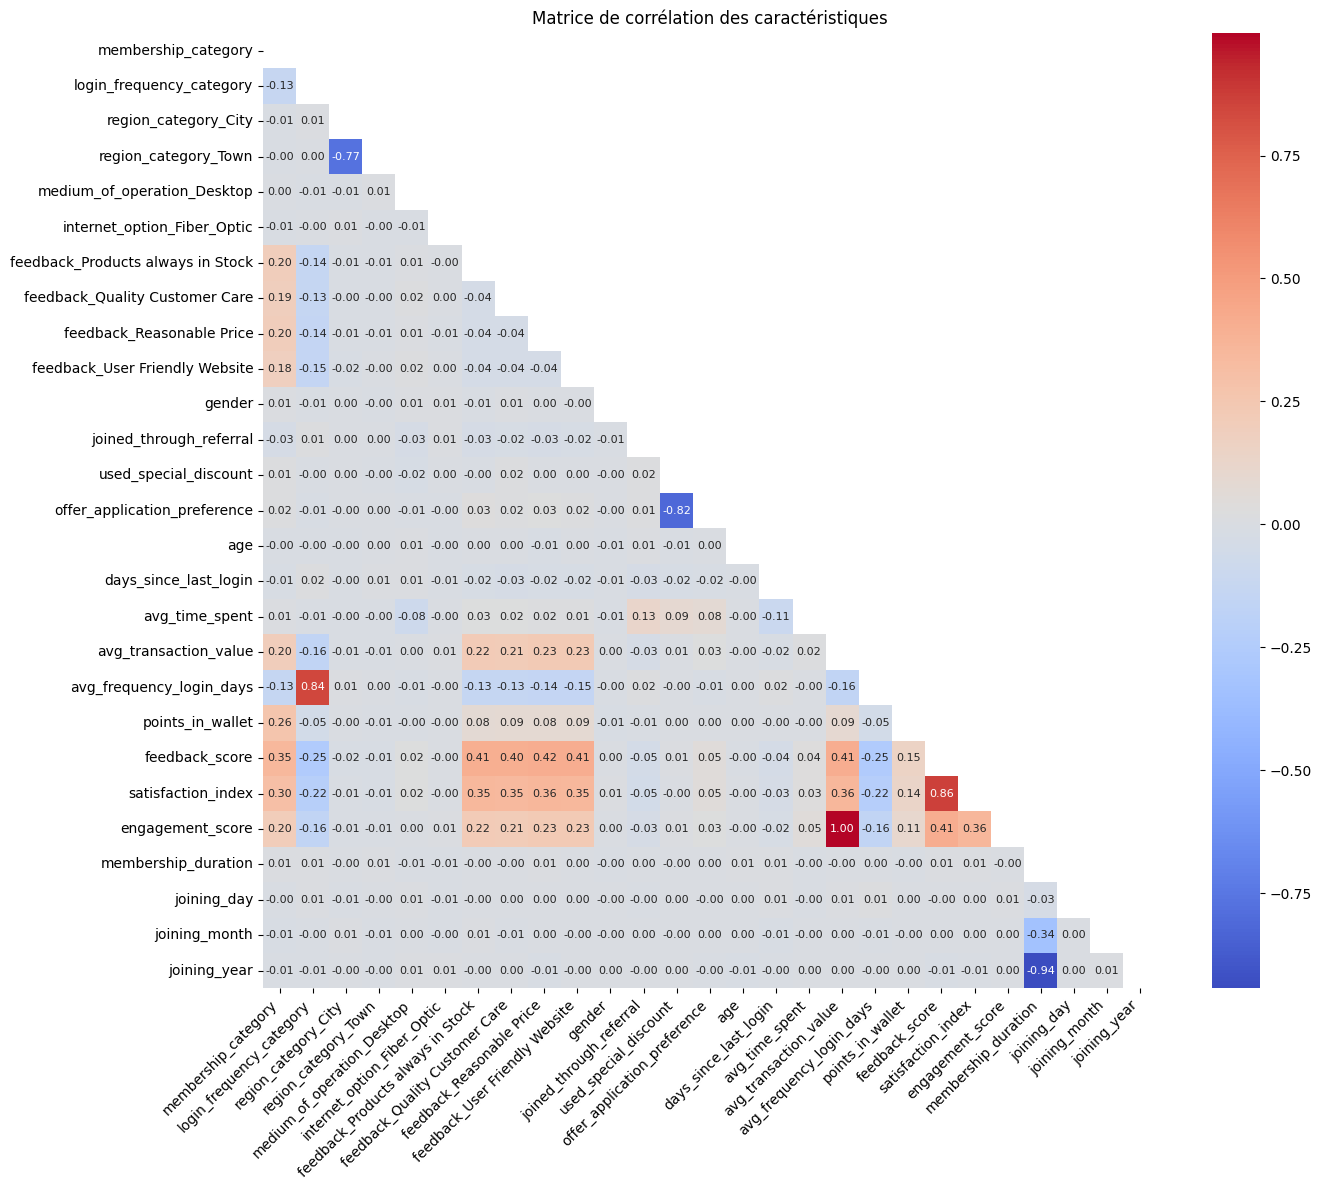

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculer la matrice de corrélation
corr = X_train.corr()

# Créer un masque pour la moitié supérieure de la matrice
mask = np.triu(np.ones_like(corr, dtype=bool))

# Créer une figure matplotlib avec une taille ajustée
plt.figure(figsize=(14, 12))

# Créer une heatmap avec les valeurs de corrélation annotées
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", mask=mask, annot_kws={"size": 8})

# Ajuster l'angle des étiquettes des axes pour éviter les chevauchements
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.title('Matrice de corrélation des caractéristiques')
plt.tight_layout()
plt.show()


On remarque de nombreuses variables extremment corrélés, on fera le choix de supprimer les variables qui presentent un seuil au dessus de 0.9

### 5.4 Gestion des valeurs abérrantes

Nous passons cette partie, en effet, nous utiliserons seulement des modèles basés sur les arbres, et ces modèles sont très robustes aux outliners.

En effectuant des opérations dessus, on risque simplement de perdre des informations qui peuvent nous être utile de notre dataset

## 6 Evaluation des modèles

In [156]:
from sklearn.metrics import auc, confusion_matrix, precision_recall_curve, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
def viz_models(y_true, y_pred, y_proba, title="Matrice de Confusion"):
    # Calcul de la matrice de confusion
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    # Affichage de la matrice de confusion
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(title)
    plt.xlabel("Prédictions")
    plt.ylabel("Vérités")
    plt.show()
    
    # Normaliser la matrice de confusion
    conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

    # Affichage de la heatmap des erreurs de classification
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix_normalized, annot=True, fmt=".2f", cmap="Blues", cbar=False, xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
    plt.title('Heatmap des Erreurs de Classification')
    plt.xlabel('Classe Prédite')
    plt.ylabel('Classe Réelle')
    plt.show()

    # Calcul de la courbe ROC
    fpr, tpr, roc_thresholds = roc_curve(y_true, y_proba)
    roc_auc = auc(fpr, tpr)

    # Création du DataFrame pour Altair
    roc_data = pd.DataFrame({
        'FPR': fpr,
        'TPR': tpr,
        'Thresholds': roc_thresholds
    })

    # Affichage de la courbe ROC
    roc_chart = alt.Chart(roc_data).mark_line().encode(
        x=alt.X('FPR', title='False Positive Rate'),
        y=alt.Y('TPR', title='True Positive Rate'),
        tooltip=['Thresholds']
    ).properties(
        title=f'ROC Curve (AUC = {roc_auc:.2f})'
    )

    roc_chart.display()

    # Calcul de la courbe précision-rappel
    precision, recall, pr_thresholds = precision_recall_curve(y_true, y_proba)

    # Création du DataFrame pour Altair
    pr_data = pd.DataFrame({
        'Precision': precision[:-1],
        'Recall': recall[:-1],
        'Thresholds': pr_thresholds
    })

    # Affichage de la courbe précision-rappel
    pr_chart = alt.Chart(pr_data).mark_line().encode(
        x=alt.X('Recall', title='Recall'),
        y=alt.Y('Precision', title='Precision'),
        tooltip=['Thresholds']
    ).properties(
        title='Precision-Recall Curve'
    )

    pr_chart.display()


In [157]:
for col in X_train.columns:
    X_train[col] = X_train[col].astype(float)
    X_test[col] = X_test[col].astype(float)

### 6.1 Première approche avec des 'dirty' modèles

In [158]:
pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Réduire largement X_train et y_train pour le test des modèles
X_train_small = X_train.sample(frac=0.1, random_state=42)
y_train_small = y_train.loc[X_train_small.index]

# Définir les modèles à entraîner avec une pipeline incluant le scaler
models = {
    'Logistic Regression': make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000)),
    'Naive Bayes': make_pipeline(StandardScaler(), GaussianNB()),
    'SVM': make_pipeline(StandardScaler(), SVC(probability=True)),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Neural Network': make_pipeline(StandardScaler(), MLPClassifier(max_iter=1000, random_state=42)),
    'K-Nearest Neighbors': make_pipeline(StandardScaler(), KNeighborsClassifier()),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', use_label_encoder=False),
    'LightGBM': LGBMClassifier(random_state=42)
}

# Fonction pour afficher les variables importantes
def get_feature_importances(model, X_train):
    if hasattr(model, 'named_steps'):
        for step_name, step in model.named_steps.items():
            if hasattr(step, 'coef_'):
                importances = step.coef_[0]
                break
            elif hasattr(step, 'feature_importances_'):
                importances = step.feature_importances_
                break
        else:
            return None
    elif hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        importances = model.coef_[0]
    else:
        return None
    feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
    return feature_importances.sort_values(by='Importance', ascending=False)

# Entraînement des modèles, extraction des importances des variables et calcul des scores
results = {}
for name, model in models.items():
    model.fit(X_train_small, y_train_small)
    
    # Calculer les importances des variables
    feature_importances = get_feature_importances(model, X_train_small)
    if feature_importances is not None:
        print(f"Feature importances for {name}:")
        print(feature_importances.head(20))
    
    # Calculer les scores de validation croisée
    scores = cross_val_score(model, X_train_small, y_train_small, cv=5, scoring='accuracy')
    results[name] = {
        'mean_accuracy': np.mean(scores),
        'std_accuracy': np.std(scores)
    }

# Afficher les résultats
results_df = pd.DataFrame(results).T
results_df


On remarque à première vue que ce sont les modèles basés sur les arbres qui ont les meilleurs performances(pas surprenant (https://arxiv.org/abs/2207.08815)) 
On remarque également que 'membership_category" est quasiment de façon systématique la feature la plus importante.
On gardera pour la suite les modèles suivants:
- Random Forest	
- Gradient Boosting
- XGBoost	


### 6.2 XGBOOST

In [ ]:
!pip install xgboost


### 6.2.1 Recherche d'hyperparametre avec cross validation sur l'ensemble d'entraînement

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Modèle de base XGBoost
model = XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)

# Distribution de paramètres
param_dist = {
    'n_estimators': np.arange(100, 501, 50),
    'learning_rate': np.linspace(0.01, 0.2, 20),
    'max_depth': np.arange(3, 10, 1),
    'subsample': np.linspace(0.8, 1.0, 5),
    'colsample_bytree': np.linspace(0.8, 1.0, 5),
    'min_child_weight': np.arange(1, 6, 1),
    'gamma': np.linspace(0, 0.5, 10)
}

# Randomized Search avec 200 itérations
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=200, scoring='accuracy', cv=5, verbose=1, n_jobs=-1, random_state=42)

# Entraînement du modèle
random_search.fit(X_train, y_train)

# Affichage des meilleurs paramètres et du score
best_params = random_search.best_params_
best_score = random_search.best_score_
cv_results = random_search.cv_results_

print(f"Meilleurs paramètres trouvés : {best_params}")
print(f"Meilleur score de validation croisée : {best_score}")

# Calcul et affichage de la moyenne et de la déviation standard pour chaque ensemble de paramètres
for i in range(len(cv_results['params'])):
    params = cv_results['params'][i]
    mean_score = cv_results['mean_test_score'][i]
    std_dev = cv_results['std_test_score'][i]
    
    print(f"Paramètres testés : {params}")
    print(f"Score moyen : {mean_score}")
    print(f"Déviation standard : {std_dev}\n")



### 6.2.2 Test sur l'ensemble de validation

Parmis les meilleurs performances, on retrouve dans le top plusieurs modèles qui sont équivalent, on va en tester un au hasard sur l'ensemble de test

Paramètres testés : {'subsample': 0.9, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 6, 'learning_rate': 0.02, 'gamma': 0.38888888888888884, 'colsample_bytree': 0.95}




In [160]:
from sklearn.metrics import classification_report

              precision    recall  f1-score   support

    No Churn       0.93      0.95      0.94      3145
       Churn       0.95      0.92      0.93      2774

    accuracy                           0.94      5919
   macro avg       0.94      0.94      0.94      5919
weighted avg       0.94      0.94      0.94      5919



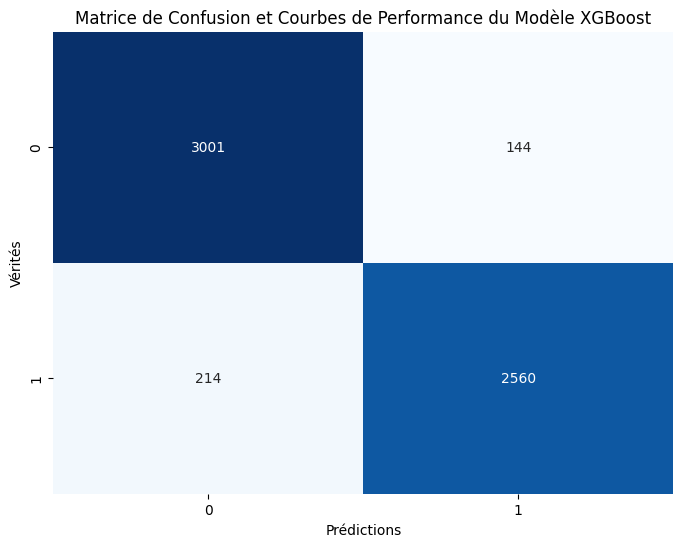

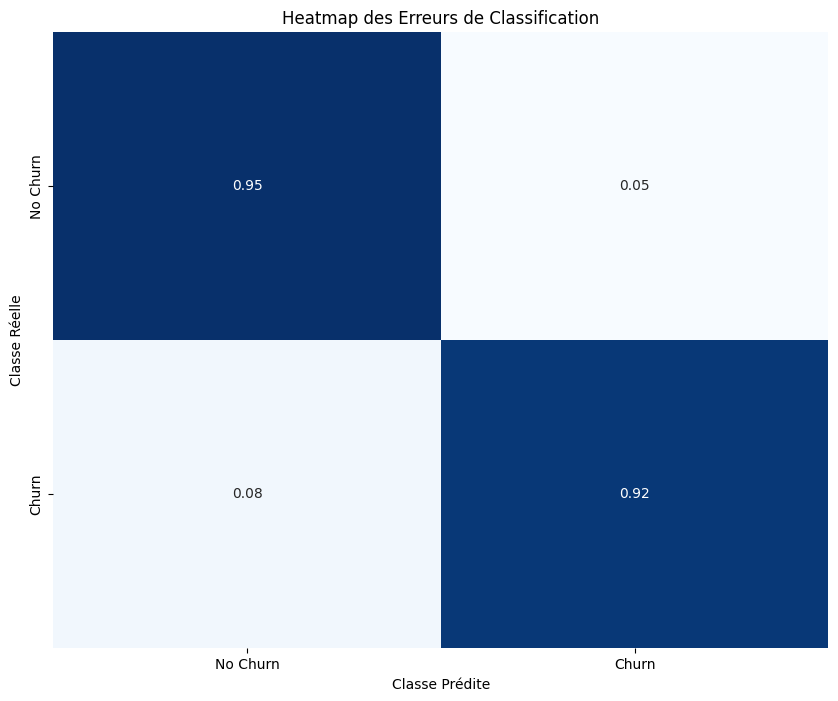

alt.Chart(...)

alt.Chart(...)

In [161]:
#Paramètres testés : {'subsample': 0.9, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 6, 'learning_rate': 0.02, 'gamma': 0.38888888888888884, 'colsample_bytree': 0.95}
# Entraîner le modèle XGBoost avec les meilleurs paramètres avec un ensemble de validation

best_params = {'subsample': 0.9, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 6, 'learning_rate': 0.02, 'gamma': 0.38888888888888884, 'colsample_bytree': 0.95}


model = XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, **best_params)
#on fit sur 4 fold et on valide sur le 5eme

#cééé les 4 premiers fold
X_train_4folds = X_train.iloc[:int(len(X_train)*0.8)]
y_train_4folds = y_train.iloc[:int(len(y_train)*0.8)]

#créé le 5eme fold
X_val_fold = X_train.iloc[int(len(X_train)*0.8):]
y_val_fold = y_train.iloc[int(len(y_train)*0.8):]

# Entraîner le modèle sur les 4 premiers folds
model.fit(X_train_4folds, y_train_4folds)

# Prédire les étiquettes sur le 5ème fold
y_pred = model.predict(X_val_fold)

# Afficher le rapport de classification
print(classification_report(y_val_fold, y_pred, target_names=['No Churn', 'Churn']))

# viz model

y_proba = model.predict_proba(X_val_fold)[:, 1]
viz_models(y_val_fold, y_pred, y_proba, title="Matrice de Confusion et Courbes de Performance du Modèle XGBoost")



Ce sont des résultats très correctes, on remarque cependant un recall de 92% pour la classe 'Churn', donc le modèle va "louper" 8% des clients qui vont churn
Ce qui n'est pas souhaitable, on va préféré louper moins de clients qui vont churn à défault d'en classifier un peu plus en 'Churn' même si ils ne le sont pas
On va donc ajuster le threshold du modèle pour avoir un meilleur recall pour la classe "Churn" à default d'une précision légèrement inferieur



### 6.2.3 Test sur l'ensemble de validation avec seuil ajusté

              precision    recall  f1-score   support

    No Churn       0.95      0.92      0.94      3145
       Churn       0.92      0.95      0.93      2774

    accuracy                           0.94      5919
   macro avg       0.94      0.94      0.94      5919
weighted avg       0.94      0.94      0.94      5919



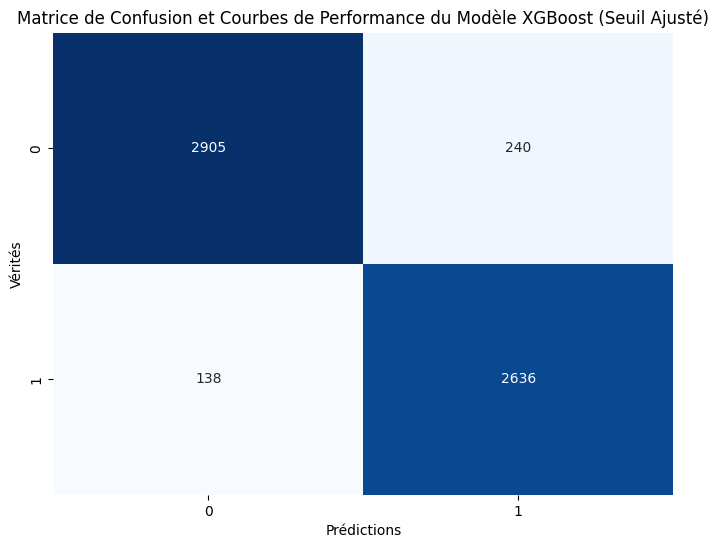

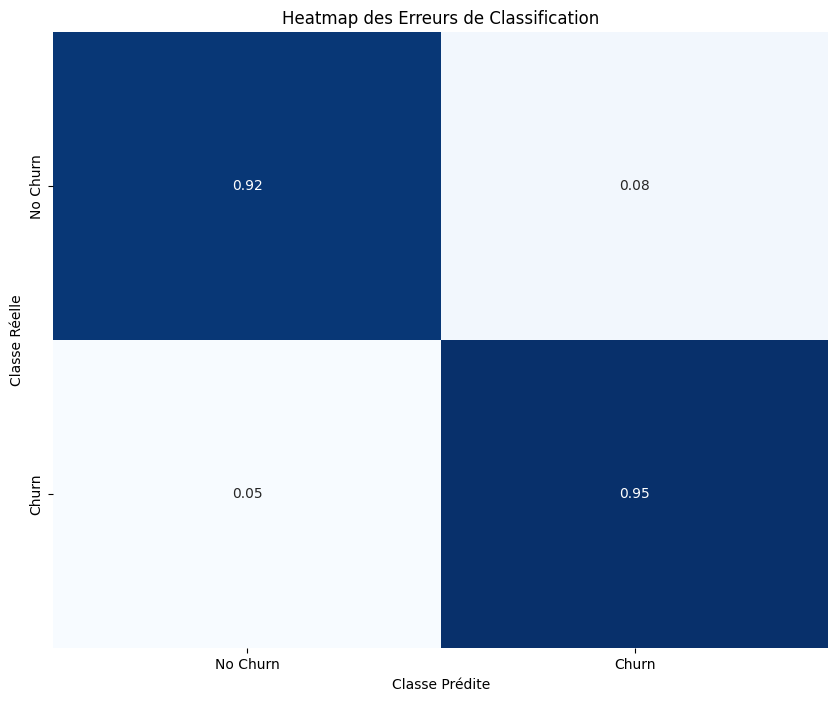

alt.Chart(...)

alt.Chart(...)

In [162]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve

# Prédire les probabilités sur le 5ème fold
y_pred_proba = model.predict_proba(X_val_fold)[:, 1]

# Calculer la courbe précision-rappel
precision, recall, thresholds = precision_recall_curve(y_val_fold, y_pred_proba)

# Trouver le plus grand seuil qui permet d'atteindre un recall >= 0.95 pour 'Churn'
desired_recall = 0.95
thresholds_above_recall = thresholds[recall[:-1] >= desired_recall]
if len(thresholds_above_recall) > 0:
    optimal_threshold = max(thresholds_above_recall)
else:
    optimal_threshold = 1.0  # Si aucun seuil ne permet d'atteindre le recall désiré

# Ajuster les prédictions en utilisant le seuil optimal
y_pred_adjusted_xgb = (y_pred_proba >= optimal_threshold).astype(int)

# Rapport de classification ajusté
report_adjusted = classification_report(y_val_fold, y_pred_adjusted_xgb, target_names=['No Churn', 'Churn'])
print(report_adjusted)

# viz models

viz_models(y_val_fold, y_pred_adjusted_xgb, y_pred_proba, title="Matrice de Confusion et Courbes de Performance du Modèle XGBoost (Seuil Ajusté)")



En ajustant le threeshold, on obtiet des résultats plus souhaitable, 0.95 de recall pour la classe "Churn", donc seulement 5% de churn manqués, pour une précision à 92%
On va maintenant tester ce modèle avec le seuil ajuster 

### 6.2.4 Test sur l'ensemble de test 

              precision    recall  f1-score   support

    No Churn       0.95      0.92      0.94      4022
       Churn       0.91      0.95      0.93      3377

    accuracy                           0.93      7399
   macro avg       0.93      0.94      0.93      7399
weighted avg       0.94      0.93      0.93      7399



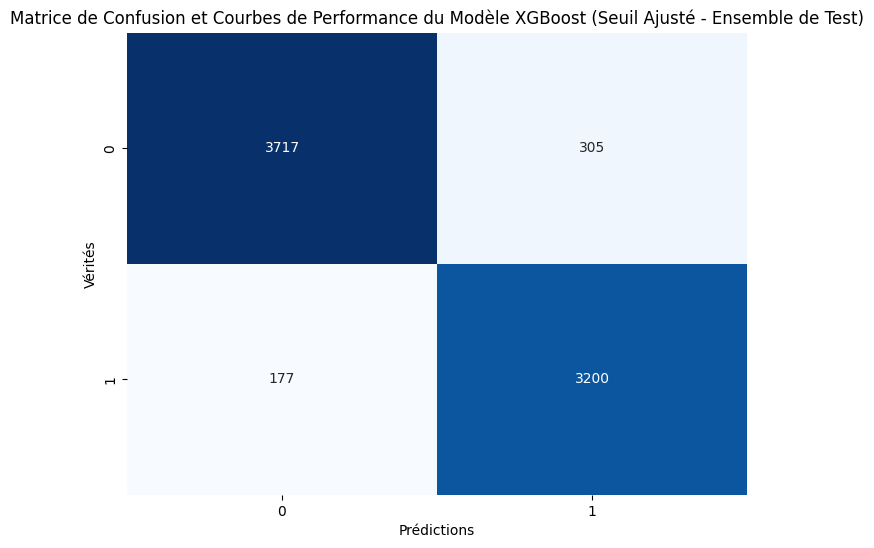

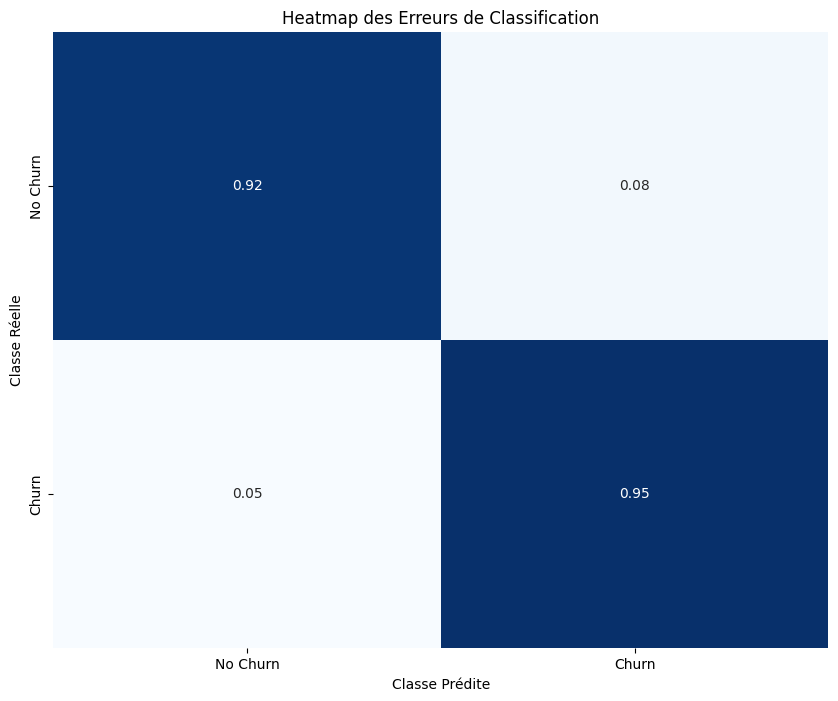

alt.Chart(...)

alt.Chart(...)

In [ ]:
# Tester le modèle sur l'ensemble de test avec le seuil optimal
y_test_proba = model.predict_proba(X_test)[:, 1]
y_test_pred_adjusted = (y_test_proba >= optimal_threshold).astype(int)

# Rapport de classification ajusté pour l'ensemble de test
report_test_adjusted_xgb = classification_report(y_test, y_test_pred_adjusted, target_names=['No Churn', 'Churn'])
print(report_test_adjusted_xgb)

# viz models

viz_models(y_test, y_test_pred_adjusted, y_test_proba, title="Matrice de Confusion et Courbes de Performance du Modèle XGBoost (Seuil Ajusté - Ensemble de Test)")


On a des résultats légèrement inferieur à l'ensemble de validation, mais cela reste des résultats très satisfaisants

### 6.3 RandomForest  

### 6.3.1 Recherche d'hyperparametre avec cross validation sur l'ensemble d'entraînement

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
import numpy as np

# Modèle de base RandomForest
rf_model = RandomForestClassifier(random_state=42)

# Distribution de paramètres
param_dist = {
    'n_estimators': np.arange(100, 301, 100),
    'max_depth': np.arange(5, 8, 1),
    'min_samples_split': np.arange(2, 6, 1),
    'min_samples_leaf': np.arange(1, 3, 1),
    'max_features': ['sqrt', 'log2', None]
}

# Randomized Search avec 200 itérations
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=200, scoring='accuracy', cv=5, verbose=1, n_jobs=-1, random_state=42)

# Entraînement du modèle
random_search.fit(X_train, y_train)

# Affichage des meilleurs paramètres et du score
best_params = random_search.best_params_
best_score = random_search.best_score_
cv_results = random_search.cv_results_

print(f"Meilleurs paramètres trouvés : {best_params}")
print(f"Meilleur score de validation croisée : {best_score}")

# Calcul et affichage de la moyenne et de la déviation standard pour chaque ensemble de paramètres
for i in range(len(cv_results['params'])):
    params = cv_results['params'][i]
    mean_score = cv_results['mean_test_score'][i]
    std_dev = cv_results['std_test_score'][i]
    
    print(f"Paramètres testés : {params}")
    print(f"Score moyen : {mean_score}")
    print(f"Déviation standard : {std_dev}\n")








### 6.3.2 Test sur l'ensemble de validation

              precision    recall  f1-score   support

    No Churn       0.94      0.95      0.94      3145
       Churn       0.94      0.93      0.93      2774

    accuracy                           0.94      5919
   macro avg       0.94      0.94      0.94      5919
weighted avg       0.94      0.94      0.94      5919



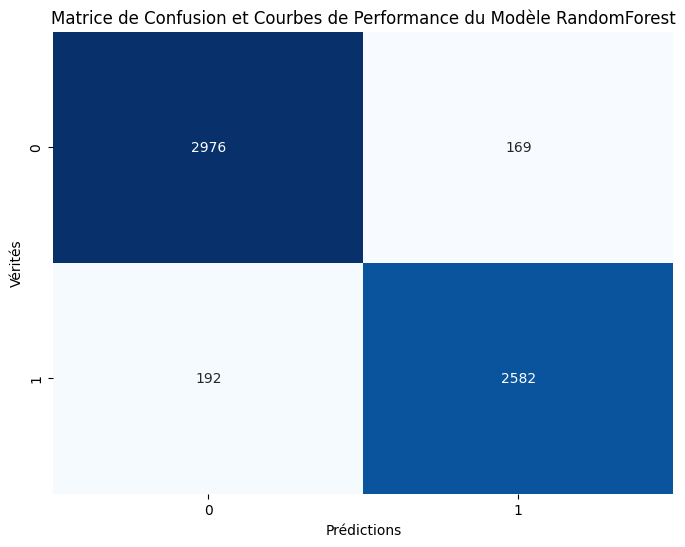

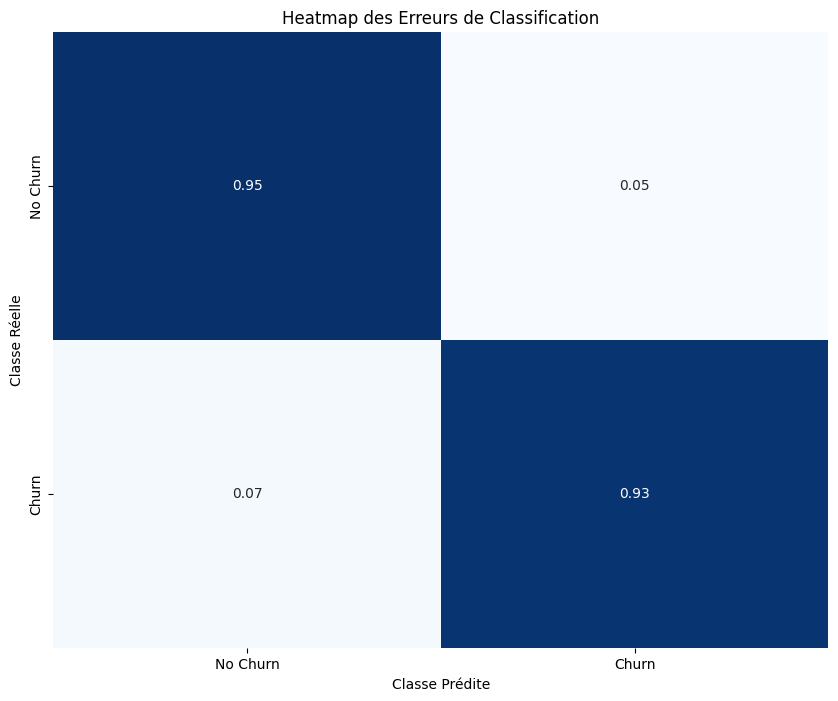

alt.Chart(...)

alt.Chart(...)

In [ ]:
#Paramètres testés : {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 6}
# Entraîner le modèle RandomForest avec les meilleurs paramètres

best_params = {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 6}

rf_model = RandomForestClassifier(random_state=42, **best_params)

#entrainement sur les 4 premiers fold
rf_model.fit(X_train_4folds, y_train_4folds)

# Prédire les étiquettes sur le 5ème fold
y_pred_rf = rf_model.predict(X_val_fold)

# Afficher le rapport de classification
print(classification_report(y_val_fold, y_pred_rf, target_names=['No Churn', 'Churn']))

# viz models

y_proba_rf = rf_model.predict_proba(X_val_fold)[:, 1]
viz_models(y_val_fold, y_pred_rf, y_proba_rf, title="Matrice de Confusion et Courbes de Performance du Modèle RandomForest")


De nouveau, on va ajuster le seuil pour viser 0.95 en recall pour la classe 'Churn'

### 6.3.3 Test sur l'ensemble de validation avec seuil ajusté

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve

# Prédire les probabilités sur le 5ème fold
y_pred_proba = rf_model.predict_proba(X_val_fold)[:, 1]

# Calculer la courbe précision-rappel
precision, recall, thresholds = precision_recall_curve(y_val_fold, y_pred_proba)

# Trouver le plus grand seuil qui permet d'atteindre un recall >= 0.95 pour 'Churn'
desired_recall = 0.95
thresholds_above_recall = thresholds[recall[:-1] >= desired_recall]
if len(thresholds_above_recall) > 0:
    optimal_threshold = max(thresholds_above_recall)
else:
    optimal_threshold = 1.0  # Si aucun seuil ne permet d'atteindre le recall désiré

# Ajuster les prédictions en utilisant le seuil optimal
y_pred_adjusted = (y_pred_proba >= optimal_threshold).astype(int)

# Rapport de classification ajusté
report_adjusted = classification_report(y_val_fold, y_pred_adjusted, target_names=['No Churn', 'Churn'])
print(report_adjusted)

#viz models

viz_models(y_val_fold, y_pred_adjusted, y_pred_proba, title="Matrice de Confusion et Courbes de Performance du Modèle RandomForest (Seuil Ajusté)")


### 6.3.4 Test sur l'ensemble de test

              precision    recall  f1-score   support

    No Churn       0.95      0.92      0.94      4022
       Churn       0.91      0.95      0.93      3377

    accuracy                           0.93      7399
   macro avg       0.93      0.93      0.93      7399
weighted avg       0.93      0.93      0.93      7399



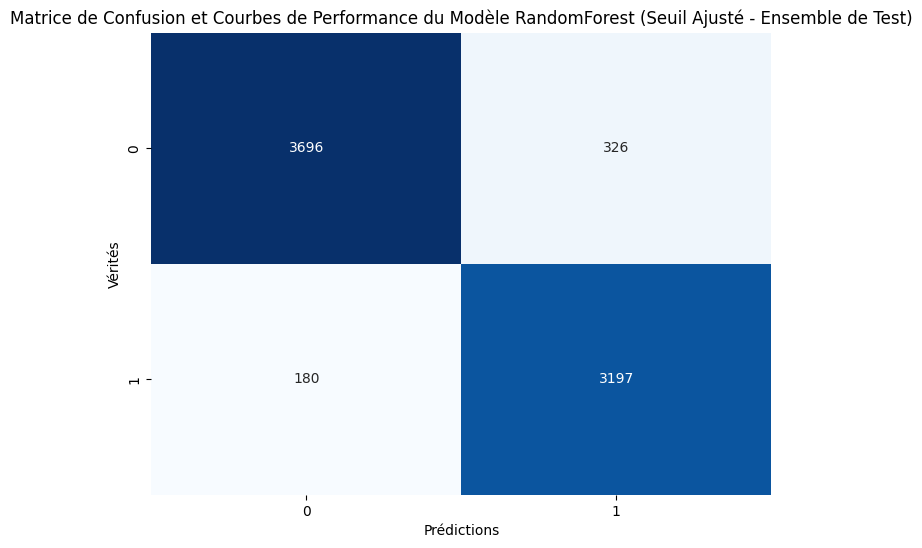

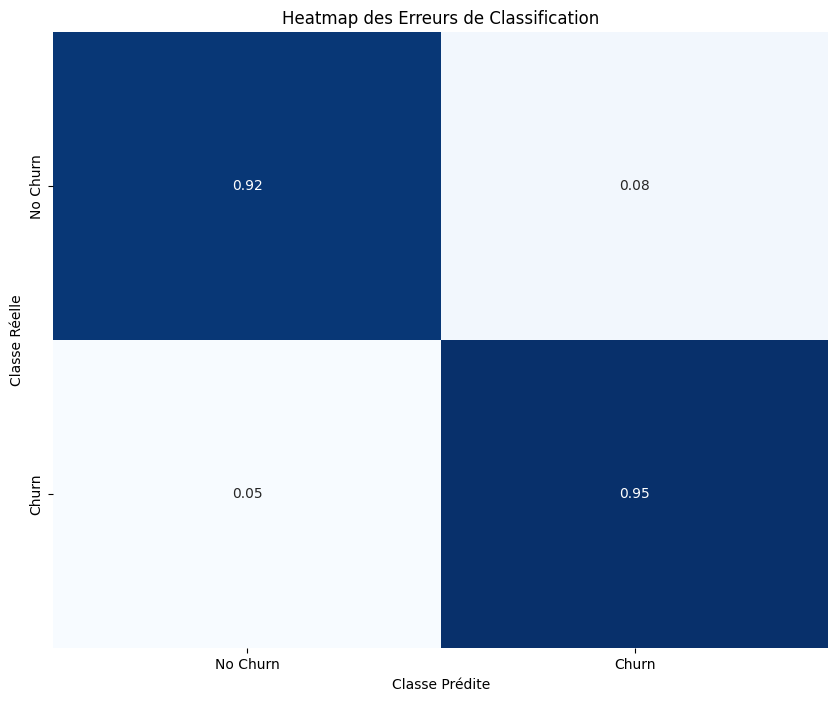

alt.Chart(...)

alt.Chart(...)

In [ ]:
# Tester le modèle sur l'ensemble de test avec le seuil optimal
y_test_proba = rf_model.predict_proba(X_test)[:, 1]
y_test_pred_adjusted_rf = (y_test_proba >= optimal_threshold).astype(int)

# Rapport de classification ajusté pour l'ensemble de test
report_test_adjusted_rf = classification_report(y_test, y_test_pred_adjusted_rf, target_names=['No Churn', 'Churn'])
print(report_test_adjusted_rf)

# viz

viz_models(y_test, y_test_pred_adjusted_rf, y_test_proba, title="Matrice de Confusion et Courbes de Performance du Modèle RandomForest (Seuil Ajusté - Ensemble de Test)")


Des performances légèrement inférieure à XGBOOST mais satisfaisante de nouveau

### 6.4 Gradient Boosting  

### 6.4.1 Recherche d'hyperparametre avec cross validation sur l'ensemble d'entraînement

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
import numpy as np

# Modèle de base Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)

# Distribution de paramètres
param_dist = {
    'n_estimators': np.arange(100, 301, 100),
    'max_depth': np.arange(3, 6, 1),
    'min_samples_split': np.arange(2, 6, 1),
    'min_samples_leaf': np.arange(1, 3, 1),
    'learning_rate': np.logspace(-3, 0, 4),
    'subsample': [0.8, 0.9, 1.0]
}

# Randomized Search avec 200 itérations
random_search = RandomizedSearchCV(gb_model, param_distributions=param_dist, n_iter=200, scoring='accuracy', cv=5, verbose=1, n_jobs=-1, random_state=42)

# Entraînement du modèle
random_search.fit(X_train, y_train)

# Affichage des meilleurs paramètres et du score
best_params = random_search.best_params_
best_score = random_search.best_score_
cv_results = random_search.cv_results_

print(f"Meilleurs paramètres trouvés : {best_params}")
print(f"Meilleur score de validation croisée : {best_score}")

# Calcul et affichage de la moyenne et de la déviation standard pour chaque ensemble de paramètres
for i in range(len(cv_results['params'])):
    params = cv_results['params'][i]
    mean_score = cv_results['mean_test_score'][i]
    std_dev = cv_results['std_test_score'][i]
    
    print(f"Paramètres testés : {params}")
    print(f"Score moyen : {mean_score}")
    print(f"Déviation standard : {std_dev}\n")


### 6.4.2 Test sur l'ensemble de validation

              precision    recall  f1-score   support

    No Churn       0.94      0.94      0.94      3145
       Churn       0.94      0.93      0.93      2774

    accuracy                           0.94      5919
   macro avg       0.94      0.94      0.94      5919
weighted avg       0.94      0.94      0.94      5919



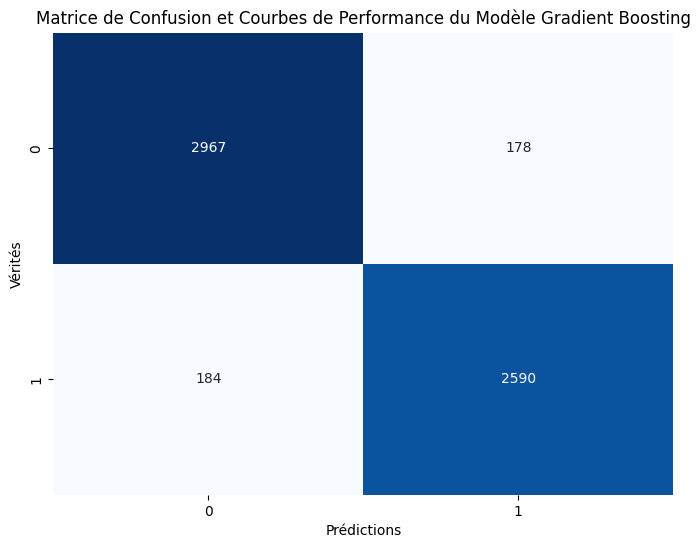

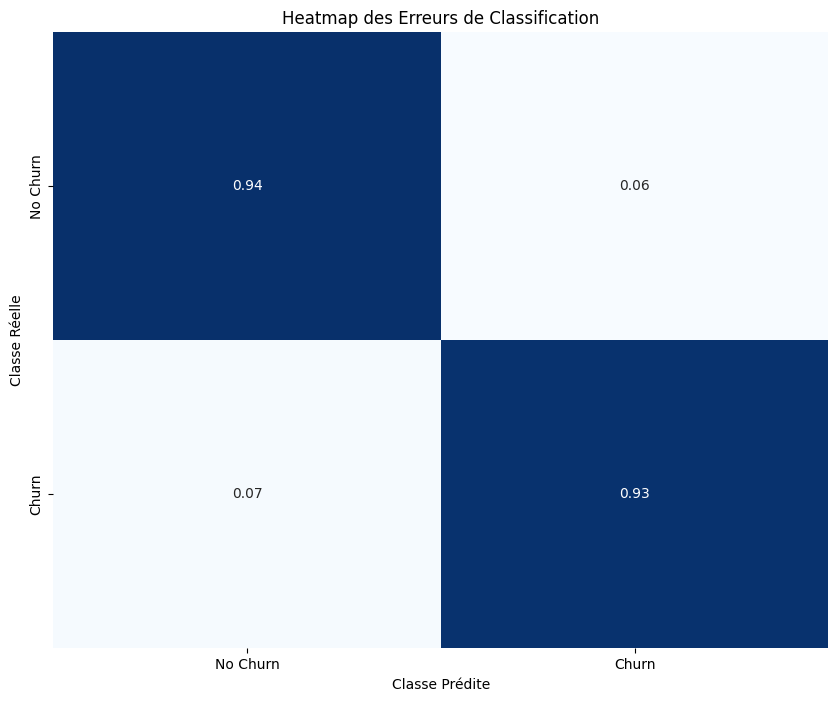

alt.Chart(...)

alt.Chart(...)

In [168]:
#Meilleurs paramètres trouvés : {'subsample': 1.0, 'n_estimators': 300, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_depth': 5, 'learning_rate': 0.01}

# Entraîner le modèle Gradient Boosting avec les meilleurs paramètres

best_params = {'subsample': 1.0, 'n_estimators': 300, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_depth': 5, 'learning_rate': 0.01}

gb_model = GradientBoostingClassifier(random_state=42, **best_params)

#entrainement sur les 4 premiers fold
gb_model.fit(X_train_4folds, y_train_4folds)

# Prédire les étiquettes sur le 5ème fold
y_pred_gb = gb_model.predict(X_val_fold)

# Afficher le rapport de classification
print(classification_report(y_val_fold, y_pred_gb, target_names=['No Churn', 'Churn']))

# viz

y_proba_gb = gb_model.predict_proba(X_val_fold)[:, 1]
viz_models(y_val_fold, y_pred_gb, y_proba_gb, title="Matrice de Confusion et Courbes de Performance du Modèle Gradient Boosting")


### 6.4.3 Test sur l'ensemble de validation avec seuil ajusté

              precision    recall  f1-score   support

    No Churn       0.95      0.92      0.94      3145
       Churn       0.92      0.95      0.93      2774

    accuracy                           0.94      5919
   macro avg       0.94      0.94      0.94      5919
weighted avg       0.94      0.94      0.94      5919



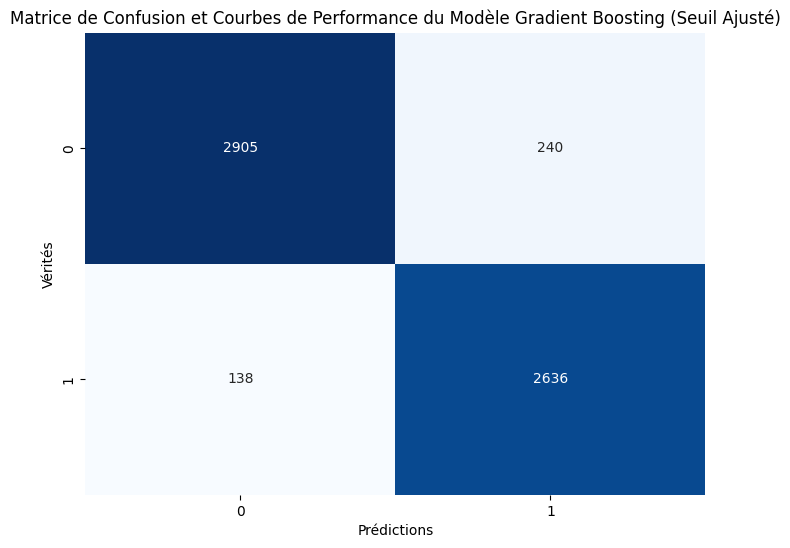

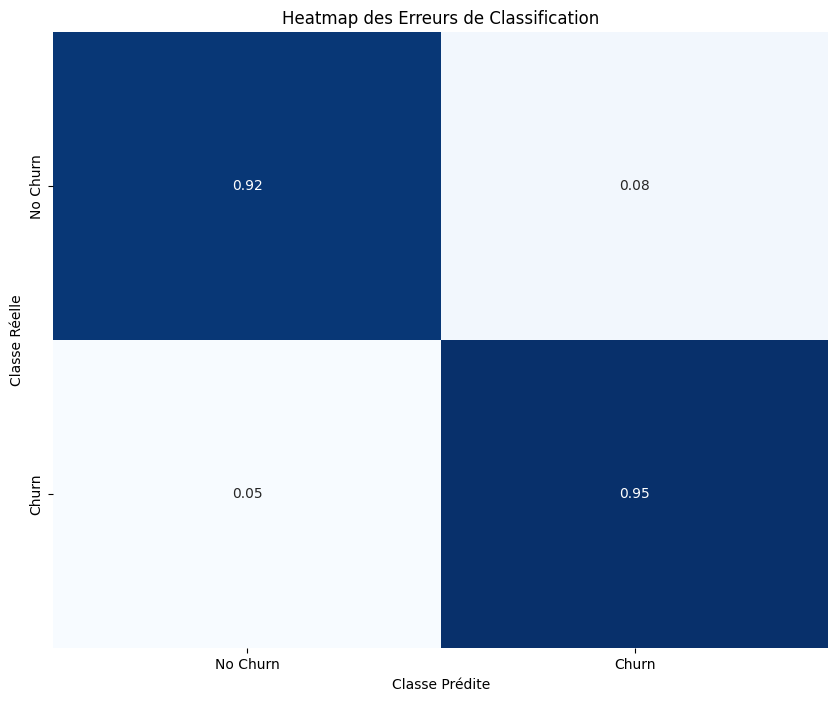

alt.Chart(...)

alt.Chart(...)

In [167]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve

# Prédire les probabilités sur le 5ème fold
y_pred_proba = gb_model.predict_proba(X_val_fold)[:, 1]

# Calculer la courbe précision-rappel
precision, recall, thresholds = precision_recall_curve(y_val_fold, y_pred_proba)

# Trouver le plus grand seuil qui permet d'atteindre un recall >= 0.95 pour 'Churn'
desired_recall = 0.95
thresholds_above_recall = thresholds[recall[:-1] >= desired_recall]

if len(thresholds_above_recall) > 0:
    optimal_threshold = max(thresholds_above_recall)
else:
    optimal_threshold = 1.0

# Ajuster les prédictions en utilisant le seuil optimal
y_pred_adjusted = (y_pred_proba >= optimal_threshold).astype(int)

# Rapport de classification ajusté
report_adjusted = classification_report(y_val_fold, y_pred_adjusted, target_names=['No Churn', 'Churn'])
print(report_adjusted)

# viz

viz_models(y_val_fold, y_pred_adjusted, y_pred_proba, title="Matrice de Confusion et Courbes de Performance du Modèle Gradient Boosting (Seuil Ajusté)")




### 6.4.4 Test sur l'ensemble de test

              precision    recall  f1-score   support

    No Churn       0.96      0.92      0.94      4022
       Churn       0.91      0.95      0.93      3377

    accuracy                           0.93      7399
   macro avg       0.93      0.93      0.93      7399
weighted avg       0.93      0.93      0.93      7399



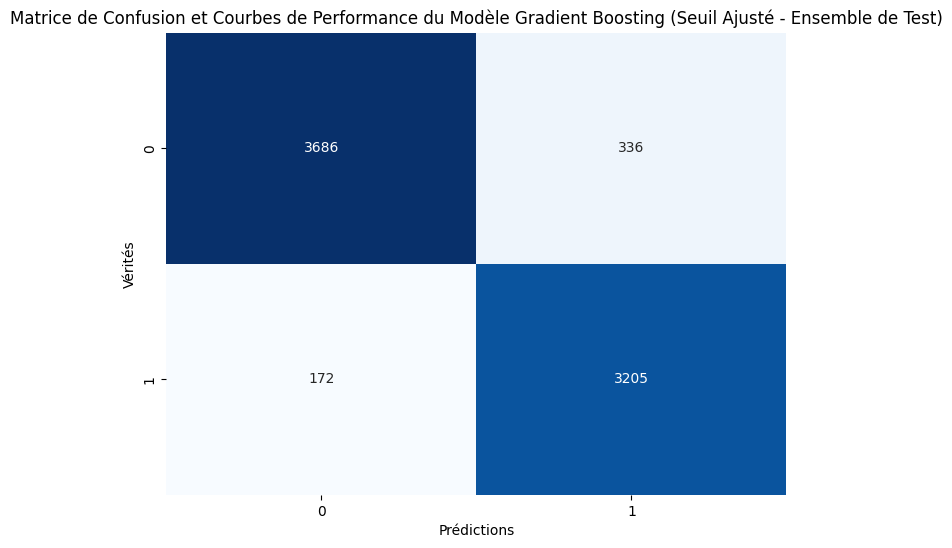

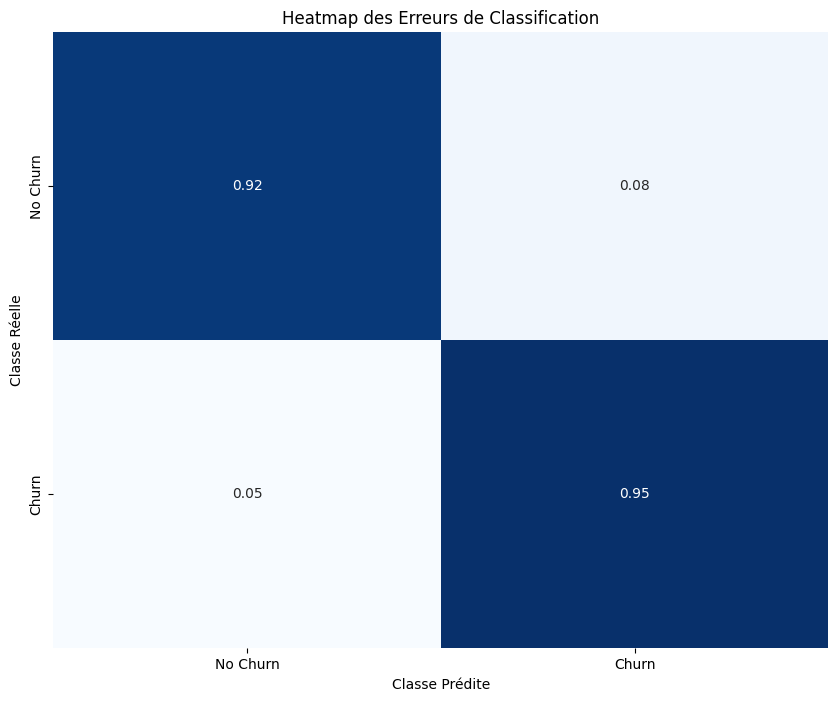

alt.Chart(...)

alt.Chart(...)

In [166]:

# Tester le modèle sur l'ensemble de test avec le seuil optimal
y_test_proba_gb = gb_model.predict_proba(X_test)[:, 1]
y_test_pred_adjusted_gb = (y_test_proba_gb>= optimal_threshold).astype(int)

# Rapport de classification ajusté pour l'ensemble de test
report_test_adjusted_gb = classification_report(y_test, y_test_pred_adjusted_gb, target_names=['No Churn', 'Churn'])
print(report_test_adjusted_gb)

# viz

viz_models(y_test, y_test_pred_adjusted_gb, y_test_proba_gb, title="Matrice de Confusion et Courbes de Performance du Modèle Gradient Boosting (Seuil Ajusté - Ensemble de Test)")


### 6.5 Ensemble learning

In [165]:


# Prédire les probabilités sur l'ensemble de test
y_pred_proba_xgb = model.predict_proba(X_test)[:, 1]
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]
y_pred_proba_gb = gb_model.predict_proba(X_test)[:, 1]

# Moyenne des probabilités
y_pred_proba_mean = (y_pred_proba_xgb + y_pred_proba_rf + y_pred_proba_gb) / 3

# Médiane des probabilités
y_pred_proba_median = np.median(np.array([y_pred_proba_xgb, y_pred_proba_rf, y_pred_proba_gb]), axis=0)

# Classe majoritaire des prédictions ajustées
y_pred_adjusted_majority = np.array([y_pred_proba_xgb, y_pred_proba_rf, y_pred_proba_gb]).mean(axis=0).round().astype(int)

# Rapport de classification pour la moyenne des probabilités
report_mean = classification_report(y_test, (y_pred_proba_mean >= 0.5).astype(int), target_names=['No Churn', 'Churn'])

# Rapport de classification pour la médiane des probabilités
report_median = classification_report(y_test, (y_pred_proba_median >= 0.5).astype(int), target_names=['No Churn', 'Churn'])

# Rapport de classification pour la classe majoritaire des probabilités
report_majority = classification_report(y_test, y_pred_adjusted_majority, target_names=['No Churn', 'Churn'])

print("Classification Report for Mean Probabilities:\n", report_mean)
print("Classification Report for Median Probabilities:\n", report_median)
print("Classification Report for Majority Class:\n", report_majority)






Classification Report for Mean Probabilities:
               precision    recall  f1-score   support

    No Churn       0.94      0.94      0.94      4022
       Churn       0.93      0.93      0.93      3377

    accuracy                           0.93      7399
   macro avg       0.93      0.93      0.93      7399
weighted avg       0.93      0.93      0.93      7399

Classification Report for Median Probabilities:
               precision    recall  f1-score   support

    No Churn       0.94      0.94      0.94      4022
       Churn       0.93      0.92      0.93      3377

    accuracy                           0.93      7399
   macro avg       0.93      0.93      0.93      7399
weighted avg       0.93      0.93      0.93      7399

Classification Report for Majority Class:
               precision    recall  f1-score   support

    No Churn       0.94      0.94      0.94      4022
       Churn       0.93      0.93      0.93      3377

    accuracy                           0.93

In [164]:
#pour chaque modele sauf l'ensemble learning

import pandas as pd

# Extraire les importances des caractéristiques pour chaque modèle
feature_importances_xgb = get_feature_importances(model, X_train)

feature_importances_rf = get_feature_importances(rf_model, X_train)

feature_importances_gb = get_feature_importances(gb_model, X_train)

# Créer un DataFrame unique pour les importances des caractéristiques
feature_importances_combined = pd.concat([
    feature_importances_xgb.add_suffix('_XGBoost'),
    feature_importances_rf.add_suffix('_RandomForest'),
    feature_importances_gb.add_suffix('_GradientBoosting')
], axis=1)

# Afficher les importances des caractéristiques

feature_importances_combined


Feature_XGBoost  Importance_XGBoost               Feature_RandomForest  Importance_RandomForest           Feature_GradientBoosting  Importance_GradientBoosting
0                 membership_category            0.831103                membership_category                 0.736053                membership_category                 7.317125e-01
19                   points_in_wallet            0.091507                   points_in_wallet                 0.236364                   points_in_wallet                 2.399491e-01
20                     feedback_score            0.033730                     feedback_score                 0.023662                     feedback_score                 2.353764e-02
21                 satisfaction_index            0.013080                 satisfaction_index                 0.000044                 satisfaction_index                 3.285129e-05
1            login_frequency_category            0.002250           login_frequency_category                 0.000017           login_frequency_category                 1.267044e-06
11            joined_through_referral            0.002124            joined_through_referral                 0.000027            joined_through_referral                 2.979090e-06
13       offer_application_preference            0.002100       offer_application_preference                 0.000027       offer_application_preference                 2.858337e-12
8           feedback_Reasonable Price            0.001951          feedback_Reasonable Price                 0.000000          feedback_Reasonable Price                 0.000000e+00
5         internet_option_Fiber_Optic            0.001944        internet_option_Fiber_Optic                 0.000027        internet_option_Fiber_Optic                 2.875677e-04
14                                age            0.001826                                age                 0.000225                                age                 1.936774e-04
24                        joining_day            0.001669                        joining_day                 0.000301                        joining_day                 1.937884e-04
16                     avg_time_spent            0.001627                     avg_time_spent                 0.000732                     avg_time_spent                 9.045746e-04
15              days_since_last_login            0.001521              days_since_last_login                 0.000316              days_since_last_login                 3.301960e-04
18           avg_frequency_login_days            0.001468           avg_frequency_login_days                 0.000451           avg_frequency_login_days                 6.565284e-04
10                             gender            0.001452                             gender                 0.000016                             gender                 4.447731e-06
17              avg_transaction_value            0.001417              avg_transaction_value                 0.000586              avg_transaction_value                 3.994373e-04
22                   engagement_score            0.001287                   engagement_score                 0.000521                   engagement_score                 1.085593e-03
23                membership_duration            0.001285                membership_duration                 0.000431                membership_duration                 5.156246e-04
2                region_category_City            0.001224               region_category_City                 0.000003               region_category_City                 2.471504e-06
12              used_special_discount            0.001223              used_special_discount                 0.000002              used_special_discount                 7.502231e-05
25                      joining_month            0.001209                      joining_month                 0.000144                      joining_month                 5.250421e-05
3                r

## 7 Résultats

On résume ici tous les résultats pour  les 3 modèles et l'ensemble learning

In [169]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def get_model_results(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return {
        'Accuracy': round(accuracy, 4),
        'Precision': round(precision, 4),
        'Recall': round(recall, 4),
        'F1-Score': round(f1, 4),
        'True Negatives': tn,
        'False Positives': fp,
        'False Negatives': fn,
        'True Positives': tp
    }

# Collect results for each model
results = {
    'XGBoost': get_model_results(y_test, y_test_pred_adjusted),
    'Random Forest': get_model_results(y_test, y_test_pred_adjusted_rf),
    'Gradient Boosting': get_model_results(y_test, y_test_pred_adjusted_gb),
    'Ensemble Majority': get_model_results(y_test, y_pred_adjusted_majority)
}

# Convert results dictionary to DataFrame
results_df = pd.DataFrame(results).T

# Sort the DataFrame by Accuracy
results_df = results_df.sort_values(by='Accuracy', ascending=False)

# Display the results DataFrame
results_df


Accuracy  Precision  Recall  F1-Score  True Negatives  False Positives  False Negatives  True Positives
Ensemble Majority    0.9350     0.9317  0.9254    0.9285          3793.0            229.0            252.0          3125.0
XGBoost              0.9349     0.9130  0.9476    0.9300          3717.0            305.0            177.0          3200.0
Random Forest        0.9316     0.9075  0.9467    0.9267          3696.0            326.0            180.0          3197.0
Gradient Boosting    0.9313     0.9051  0.9491    0.9266          3686.0            336.0            172.0          3205.0